Hannah Schmuckler (mmc4cv), Karolina Naranjo-Velasco(kn3cs), Aparna Marathe (am7ad), Beza Delelegn (bmd5bc)

In [ ]:
import numpy as np
import pandas as pd
import pymc3 as pm
from pymc3 import Model, sample, Normal, HalfCauchy, Uniform, model_to_graphviz, Bernoulli, Beta
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/6040 Final Project/deliverables/code/RawData

/content/gdrive/.shortcut-targets-by-id/1RHLJxs5BBX6-m_q9lZB4IFf56V8gRlmb/6040 Final Project/deliverables/code/RawData


### **Data Cleaning Process**

The code below shows the data cleaning that we performed and exported as a csv file - 'Cleaned_data.csv'


In [ ]:
# DEMO_I = pd.read_sas('DEMO_I.XPT')
# DEMO_I = DEMO_I[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'INDFMPIR']]
# DIQ_I = pd.read_sas('DIQ_I.XPT')
# DIQ_I = DIQ_I[['SEQN','DIQ010']]
# BPQ_I = pd.read_sas('BPQ_I.XPT')
# BPQ_I = BPQ_I[['SEQN','BPQ020', 'BPQ080']]
# HSQ_I = pd.read_sas('HSQ_I.XPT')
# HSQ_I = HSQ_I[['SEQN','HSD010']]
# DLQ_I = pd.read_sas('DLQ_I.XPT')
# DLQ_I = DLQ_I[['SEQN','DLQ100', 'DLQ140']]
# KIQ_U_I = pd.read_sas('KIQ_U_I.XPT')
# KIQ_U_I = KIQ_U_I[['SEQN','KIQ026']]
# MCQ_I = pd.read_sas('MCQ_I.XPT')
# MCQ_I = MCQ_I[['SEQN','MCQ010','MCQ080', 'MCQ160A', 'MCQ160N', 'MCQ160M', 'MCQ203', 'MCQ220', 'MCQ300A', 'MCQ300B', 'MCQ300C']]
# SLQ_I = pd.read_sas('SLQ_I.XPT')
# SLQ_I = SLQ_I[['SEQN','SLQ120']]
# WHQ_I = pd.read_sas('WHQ_I.XPT')
# WHQ_I = WHQ_I[['SEQN','WHD010', 'WHD020', 'WHD140']]
# TCHOL_I = pd.read_sas('TCHOL_I.XPT')
# TCHOL_I = TCHOL_I[['SEQN','LBXTC']]
# OGTT_I = pd.read_sas('OGTT_I.XPT')
# OGTT_I = OGTT_I[['SEQN','LBXGLT', 'GTXDRANK']]
# GLU_I = pd.read_sas('GLU_I.XPT')
# GLU_I = GLU_I[['SEQN','LBXGLU']]
# DXXAG_I = pd.read_sas('DXXAG_I.XPT')
# DXXAG_I = DXXAG_I[['SEQN','DXXAGRAT']]

In [ ]:
# DEMO_DIQ = pd.merge(DEMO_I,DIQ_I, how = "outer", on = "SEQN")
# DEMO_DIQ_BPQ = pd.merge(DEMO_DIQ,BPQ_I, how = "outer", on = "SEQN")
# DEMO_DIQ_BPQ_HSQ = pd.merge(DEMO_DIQ_BPQ,HSQ_I, how = "outer", on = "SEQN")
# DEMO_DIQ_BPQ_HSQ_DLQ = pd.merge(DEMO_DIQ_BPQ_HSQ,DLQ_I, how = "outer", on = "SEQN")
# DEMO_DIQ_BPQ_HSQ_DLQ_KIQ = pd.merge(DEMO_DIQ_BPQ_HSQ_DLQ,KIQ_U_I, how = "outer", on = "SEQN")
# DEMO_DIQ_BPQ_HSQ_DLQ_KIQ_MCQ = pd.merge(DEMO_DIQ_BPQ_HSQ_DLQ_KIQ,MCQ_I, how = "outer", on = "SEQN")
# DEMO_DIQ_BPQ_HSQ_DLQ_KIQ_MCQ_SLQ = pd.merge(DEMO_DIQ_BPQ_HSQ_DLQ_KIQ_MCQ,SLQ_I, how = "outer", on = "SEQN")
# DEMO_DIQ_BPQ_HSQ_DLQ_KIQ_MCQ_SLQ_WHQ = pd.merge(DEMO_DIQ_BPQ_HSQ_DLQ_KIQ_MCQ_SLQ,WHQ_I, how = "outer", on = "SEQN")
# DEMO_DIQ_BPQ_HSQ_DLQ_KIQ_MCQ_SLQ_WHQ_TCHOL = pd.merge(DEMO_DIQ_BPQ_HSQ_DLQ_KIQ_MCQ_SLQ_WHQ,TCHOL_I, how = "outer", on = "SEQN")
# df_final = pd.merge(DEMO_DIQ_BPQ_HSQ_DLQ_KIQ_MCQ_SLQ_WHQ_TCHOL,DXXAG_I, how = "outer", on = "SEQN")

In [ ]:
# df_final = df_final[~((df_final.DIQ010 == 7) | (df_final.DIQ010 == 9))] # Filter out respondents without answers to our response variable

In [ ]:
# df_final = df_final[df_final.RIDAGEYR >=18] # Filter out respondents who are less than 18

In [ ]:
# df_final["DIQ010"] = df_final["DIQ010"].replace(9.0, np.nan) # Removing don't knows
# df_final["DIQ010"] = df_final["DIQ010"].replace(3.0, 1.0) # Recoding borderline diabetics to yes
# df_final['BPQ020']= df_final['BPQ020'].replace(9.0, np.nan) # Removing don't knows/refused
# df_final['BPQ080']= df_final['BPQ080'].replace(9.0, np.nan)
# df_final['DLQ100']= df_final['DLQ100'].replace(9.0, np.nan)
# df_final['DLQ100']= df_final['DLQ100'].replace(7.0, np.nan)
# df_final['DLQ140']= df_final['DLQ140'].replace(9.0, np.nan)
# df_final['DLQ140']= df_final['DLQ140'].replace(7.0, np.nan)
# df_final['DLQ140']= df_final['DLQ140'].replace(9.0, np.nan)
# df_final['KIQ026']= df_final['KIQ026'].replace(9.0, np.nan)
# df_final['MCQ010']= df_final['MCQ010'].replace(7.0, np.nan)
# df_final['MCQ010']= df_final['MCQ010'].replace(9.0, np.nan)
# df_final['MCQ080']= df_final['MCQ080'].replace(9.0, np.nan)
# df_final['MCQ160A']= df_final['MCQ160A'].replace(9.0, np.nan)
# df_final['MCQ160N']= df_final['MCQ160N'].replace(9.0, np.nan)
# df_final['MCQ160M']= df_final['MCQ160M'].replace(9.0, np.nan)
# df_final['MCQ203']= df_final['MCQ203'].replace(9.0, np.nan)
# df_final['MCQ220']= df_final['MCQ220'].replace(9.0, np.nan)
# df_final['MCQ300A']= df_final['MCQ300A'].replace(7.0, np.nan)
# df_final['MCQ300A']= df_final['MCQ300A'].replace(9.0, np.nan)
# df_final['MCQ300B']= df_final['MCQ300B'].replace(9.0, np.nan)
# df_final['MCQ300C']= df_final['MCQ300C'].replace(7.0, np.nan)
# df_final['MCQ300C']= df_final['MCQ300C'].replace(9.0, np.nan)
# df_final['SLQ120']= df_final['SLQ120'].replace(9.0, np.nan)
# df_final['WHD010']= df_final['WHD010'].replace(7777, np.nan)
# df_final['WHD010']= df_final['WHD010'].replace(9999, np.nan)
# df_final['WHD020']= df_final['WHD020'].replace(7777, np.nan)
# df_final['WHD020']= df_final['WHD020'].replace(9999, np.nan)

In [ ]:
# Creating Body Mass Index - bmi

#height = np.asarray(df_final["WHD010"])
# weight = np.asarray(df_final["WHD020"])
# df_final["bmi"] = round(df_final['WHD020']/(pow(df_final["WHD010"], 2))*703, 1)
# df_final["greatest_ever_bmi"] = round(df_final['WHD140']/(pow(df_final["WHD010"], 2))*703, 1)

In [ ]:
# Fixing some floating point oddities

# df_final["SLQ120"] = round(df_final['SLQ120'], 0) 
# df_final["INDFMPIR"] = round(df_final['INDFMPIR'], 2)

In [ ]:
# df_final.drop(['WHD010', 'WHD020'], axis=1) # Remove height and weight

In [ ]:
# df_final['DIQ010']= df_final['DIQ010'].replace(2.0, 0) # Recoding so 0 = no and 1 = yes
# df_final['BPQ020']= df_final['BPQ020'].replace(2.0, 0)
# df_final['BPQ080']= df_final['BPQ080'].replace(2.0, 0)
# df_final['KIQ026']= df_final['KIQ026'].replace(2.0, 0)
# df_final['MCQ010']= df_final['MCQ010'].replace(2.0, 0)
# df_final['MCQ080']= df_final['MCQ080'].replace(2.0, 0)
# df_final['MCQ160A']= df_final['MCQ160A'].replace(2.0, 0)
# df_final['MCQ160N']= df_final['MCQ160N'].replace(2.0, 0)
# df_final['MCQ160M']= df_final['MCQ160M'].replace(2.0, 0)
# df_final['MCQ203']= df_final['MCQ203'].replace(2.0, 0)
# df_final['MCQ220']= df_final['MCQ220'].replace(2.0, 0)
# df_final['MCQ300A']= df_final['MCQ300A'].replace(2.0, 0)
# df_final['MCQ300B']= df_final['MCQ300B'].replace(2.0, 0)
# df_final['MCQ300C']= df_final['MCQ300C'].replace(2.0, 0)
# df_final['RIAGENDR']= df_final['RIAGENDR'].replace(2.0, 0) # 0 = female, 1 = male

In [ ]:
# Remove incomplete cases
# df_final = df_final.dropna(axis=0, how = "any")

In [ ]:
# Standardize continuous variables

In [ ]:
# cont=df_final.drop(columns=["SEQN","RIAGENDR","DIQ010", "BPQ020", "BPQ080", "KIQ026",	"MCQ010",	"MCQ080",	"MCQ160A"	,"MCQ160N", "MCQ160M", "MCQ203",	"MCQ220",	"MCQ300A"	,"MCQ300B"	,"MCQ300C"])

In [ ]:
# def z_score(df):
#   df_std = df.copy() #create a copy of the data frame
#   for column in df_std.columns:
#       df_std[f'{column}_Z'] = (df_std[column] - df_std[column].mean()) / df_std[column].std() #zscore equation
#   return df_std
# cont_data_stand = z_score(cont) #call function
# cont_data_stand = cont_data_stand.drop(columns=["RIDAGEYR", "RIDRETH3", "INDFMPIR", "HSD010", "DLQ100", "DLQ140", "SLQ120", "WHD010", "WHD020", "WHD140", "LBXTC", "bmi", "greatest_ever_bmi", "DXXAGRAT"])

In [ ]:
#Bring standardized back into main dataframe
# df_final = pd.concat([df_final, cont_data_stand], axis=1) 

In [ ]:
#Saving the final file of cleaned data for our analysis 
# df_final.to_csv('Cleaned_data.csv')

The code above is included for reference, but we have exported it and will re-import it below to avoid having to run all of that code every time.

In [ ]:
# Include the path to be read by Prof. Brown 

df = pd.read_csv("Cleaned_data.csv")#Hannah 

#df = pd.read_csv("/content/gdrive/MyDrive/Cleaned_data.csv") #Karolina's
df

Unnamed: 0  ...  Other Race - Including Multi-Racial
0              0  ...                                    0
1              1  ...                                    0
2              2  ...                                    0
3              3  ...                                    0
4              4  ...                                    0
...          ...  ...                                  ...
5983        9963  ...                                    0
5984        9964  ...                                    0
5985        9965  ...                                    0
5986        9968  ...                                    0
5987        9970  ...                                    0

[5988 rows x 37 columns]

In [ ]:
df = df.drop(df.columns[0],axis=1) # Drop first column
complete_data = df.dropna(axis=0, how = "any") #drop nas
complete_data

SEQN  ...  Other Race - Including Multi-Racial
1     83733.0  ...                                    0
6     83741.0  ...                                    0
7     83742.0  ...                                    0
9     83744.0  ...                                    0
11    83750.0  ...                                    1
...       ...  ...                                  ...
5978  93684.0  ...                                    0
5979  93685.0  ...                                    0
5981  93690.0  ...                                    0
5982  93691.0  ...                                    0
5987  93702.0  ...                                    0

[2392 rows x 36 columns]

In [ ]:
#standardize quantitative variables
chd_d_drop = complete_data.drop(columns=["SEQN","RIAGENDR","DIQ010", "BPQ020", "BPQ080", "KIQ026",	"MCQ010",	"MCQ080",	"MCQ160A"	,"MCQ160N", "MCQ160M", "MCQ203",	"MCQ220",	"MCQ300A"	,"MCQ300B"	,"MCQ300C", "Mexican American",	"Other Hispanic",	"Non-Hispanic White",	"Non-Hispanic Black",	"Non-Hispanic Asian", "Other Race - Including Multi-Racial" ])
#chd_d_drop

def z_score(df):
  df_std = df.copy() #create a copy of the data frame
  for column in df_std.columns:
      df_std[f'{column}_Z'] = (df_std[column] - df_std[column].mean()) / df_std[column].std() #zscore equation
  return df_std
chd_data_stand = z_score(chd_d_drop) #call function
chd_data_stand = chd_data_stand.drop(columns=["RIDAGEYR", "RIDRETH3", "INDFMPIR", "HSD010", "DLQ100", "DLQ140", "SLQ120", "WHD010", "WHD020", "WHD140", "LBXTC", "bmi", "greatest_ever_bmi", "DXXAGRAT"])

df_final = pd.concat([complete_data, chd_data_stand], axis=1)
df_final

SEQN  RIAGENDR  RIDAGEYR  ...  DXXAGRAT_Z     bmi_Z  greatest_ever_bmi_Z
1     83733.0       1.0      53.0  ...    0.410948  0.073106            -0.062477
6     83741.0       1.0      22.0  ...   -0.120684 -0.074600             0.007492
7     83742.0       0.0      32.0  ...    0.410948 -0.680197            -0.127519
9     83744.0       1.0      56.0  ...   -0.120684  0.693473            -0.028971
11    83750.0       1.0      45.0  ...   -0.652316 -0.813133            -0.081201
...       ...       ...       ...  ...         ...       ...                  ...
5978  93684.0       1.0      34.0  ...   -0.120684  0.235583            -0.062477
5979  93685.0       1.0      53.0  ...    2.005845  0.442372            -0.018130
5981  93690.0       1.0      32.0  ...    1.474213  0.782097             0.007492
5982  93691.0       1.0      25.0  ...    0.410948 -1.477812            -0.184676
5987  93702.0       0.0      24.0  ...   -1.715581 -1.108546            -0.157083

[2392 rows x 50 columns]

In [ ]:
Y = df_final["DIQ010"] # Separate Y from all X values
X = df_final.drop("DIQ010", axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=18)

**Feature Selection through WAIC Analysis (Pooled Model)**

In [ ]:
data_train_xy = {"DIQ010": Y_train, "RIAGENDR": X_train["RIAGENDR"], "RIDAGEYR": X_train["RIDAGEYR_Z"], "BPQ020": X_train["BPQ020"],
           "BPQ080": X_train["BPQ080"], "DLQ100": X_train["DLQ100_Z"], "MCQ080": X_train["MCQ080"], "MCQ160A": X_train["MCQ160A"], 
           "MCQ160N": X_train["MCQ160N"],"MCQ160M": X_train["MCQ160M"], "MCQ220": X_train["MCQ220"], "MCQ300A": X_train["MCQ300A"], 
           "MCQ300C": X_train["MCQ300C"], "WHD020": X_train["WHD020_Z"], "bmi": X_train["bmi_Z"], "LBXTC": X_train["LBXTC_Z"], 
           "DXXAGRAT": X_train["DXXAGRAT_Z"],"KIQ026": X_train["KIQ026"], "INDFMPIR": X_train["INDFMPIR_Z"], "MCQ010": X_train["MCQ010"], 
           "DLQ140": X_train["DLQ140_Z"],"RIDRETH3":X_train["RIDRETH3"]}
data_final = pd.DataFrame(data = data_train_xy)


full_train = data_final [["RIDRETH3","RIAGENDR","RIDAGEYR", "BPQ020", "BPQ080", "DLQ100", "MCQ080", "MCQ160A", "MCQ160N", "MCQ160M", "MCQ220", "MCQ300A", "MCQ300C", "WHD020", "bmi", "LBXTC", "DXXAGRAT", "KIQ026", "INDFMPIR", "MCQ010", "DLQ140"]]


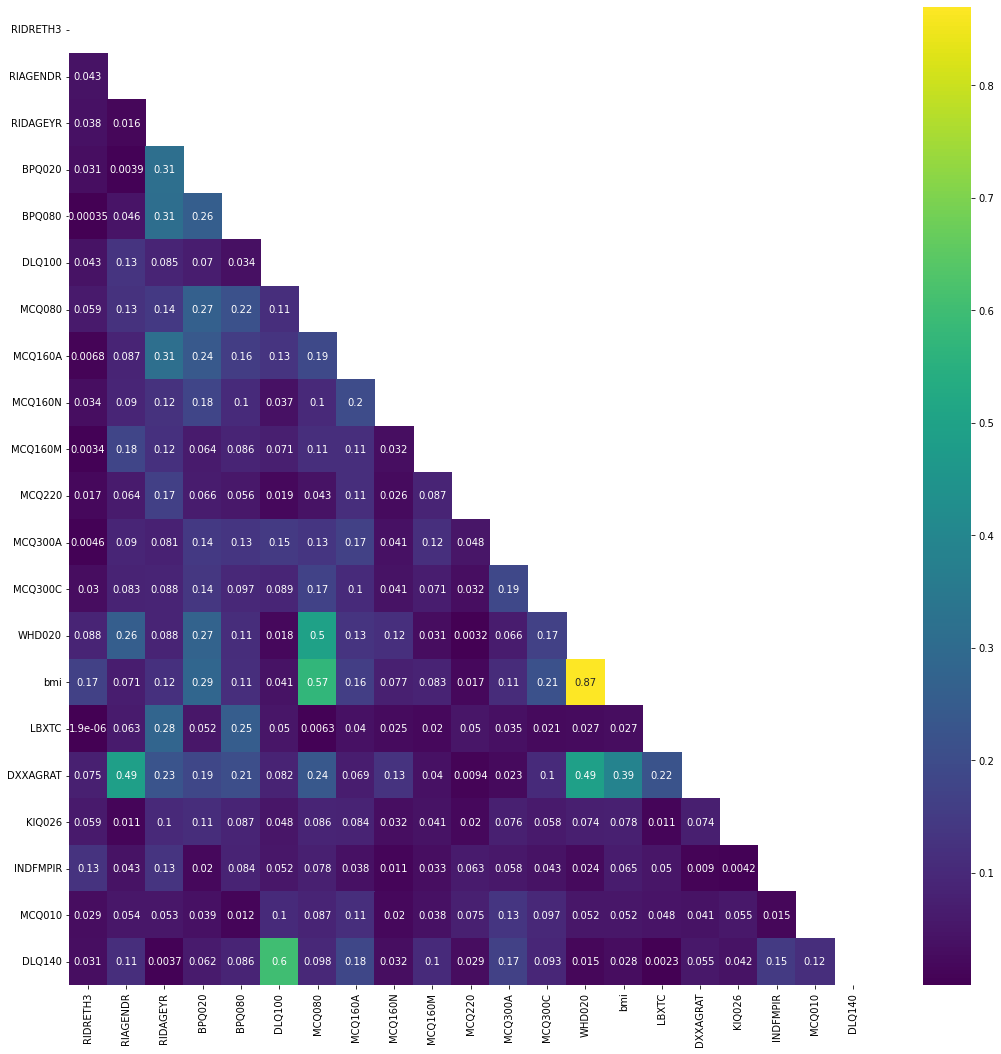

In [ ]:
#Check correlation to see which variables makes sense to drop

plt.figure(figsize=(18, 18))
corr = full_train.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis');

From here, we see which predictor variables are most highly correlated.   
(1) bmi and WHD020 have the highest correlation = 0.87.  
(2) bmi and MCQ080 are moderately correlated (0.57).   
(3) WHD020 and MCQ080 are also moderately correlated (0.5).  
(4) DXXAGRAT and RIAGENDR are moderately correlated (0.49).  
(5) DLQ140 and DLQ100 are highly correlated (0.6).  
(6) DXXAGRAT and WHD020 are moderately correlated (0.49).    

These correlation will inform our decisions for which predictors to remove in our reduced models.

In [ ]:
reduced1 = full_train[["RIAGENDR","RIDAGEYR", "BPQ020","BPQ080", "DLQ100", "MCQ080", "MCQ160A", "MCQ160N", "MCQ160M", "MCQ220", "MCQ300A", "MCQ300C", "WHD020", "bmi", "LBXTC", "DXXAGRAT"]]
#model 1 drops RIDETH3, KIQ026, INDFMPR, MCQ010, DLQ140

reduced2 = full_train[["RIAGENDR","RIDAGEYR", "DLQ100", "MCQ080", "MCQ160A", "MCQ160N", "MCQ160M", "MCQ220", "MCQ300A", "MCQ300C", "bmi", "DXXAGRAT"]]
#model 2 additionally removes WHD020, BPQ020, BPQ080

reduced3 = full_train[["RIAGENDR","RIDAGEYR", "DLQ100", "MCQ160A", "MCQ160N", "MCQ160M", "MCQ300A", "MCQ300C", "bmi"]]


In [ ]:
data_xy_TEST = {"DIQ010": Y_test, "RIAGENDR": X_test["RIAGENDR"], "RIDAGEYR": X_test["RIDAGEYR_Z"], "BPQ020": X_test["BPQ020"],
           "BPQ080": X_test["BPQ080"], "DLQ100": X_test["DLQ100_Z"], "MCQ080": X_test["MCQ080"], "MCQ160A": X_test["MCQ160A"], 
           "MCQ160N": X_test["MCQ160N"],"MCQ160M": X_test["MCQ160M"], "MCQ220": X_test["MCQ220"], "MCQ300A": X_test["MCQ300A"], 
           "MCQ300C": X_test["MCQ300C"], "WHD020": X_test["WHD020_Z"], "bmi": X_test["bmi_Z"], "LBXTC": X_test["LBXTC_Z"], 
           "DXXAGRAT": X_test["DXXAGRAT_Z"],"KIQ026": X_test["KIQ026"], "INDFMPIR": X_test["INDFMPIR_Z"], "MCQ010": X_test["MCQ010"], 
           "DLQ140": X_test["DLQ140_Z"], "RIDRETH3":X_test["RIDRETH3"]}
complete_data_TEST = pd.DataFrame(data = data_xy_TEST)
full_test = complete_data_TEST[["RIAGENDR","RIDAGEYR", "BPQ020", "BPQ080", "DLQ100", "MCQ080", "MCQ160A", "MCQ160N", "MCQ160M", "MCQ220", "MCQ300A", "MCQ300C", "WHD020", "bmi", "LBXTC", "DXXAGRAT", "KIQ026", "INDFMPIR", "MCQ010", "DLQ140","RIDRETH3"]]


In [ ]:
full_train

RIDRETH3  RIAGENDR  RIDAGEYR  BPQ020  ...  KIQ026  INDFMPIR  MCQ010    DLQ140
4935       6.0       1.0 -0.926493     0.0  ...     0.0 -0.189106     0.0  0.826511
5456       2.0       0.0 -1.542684     0.0  ...     0.0 -0.675220     0.0 -0.075412
459        1.0       0.0 -1.014521     0.0  ...     0.0  1.244307     0.0 -0.075412
3450       3.0       1.0 -0.310303     0.0  ...     0.0 -0.319983     0.0 -0.075412
1937       1.0       1.0  1.098132     0.0  ...     0.0 -0.968135     0.0  0.826511
...        ...       ...       ...     ...  ...     ...       ...     ...       ...
5703       3.0       0.0  1.362213     0.0  ...     0.0 -0.606665     0.0 -1.879258
3013       2.0       1.0 -0.398330     0.0  ...     0.0 -1.373230     0.0  0.826511
4337       3.0       1.0  0.834050     1.0  ...     1.0  1.512293     1.0 -0.075412
2885       3.0       0.0 -0.222276     0.0  ...     0.0 -0.463324     0.0 -0.075412
676        6.0       1.0 -1.366629     0.0  ...     0.0 -0.818561     1.0  0.826511

[1913 rows x 21 columns]

In [ ]:
observed_y = Y_train
observed_y

4935    0.0
5456    0.0
459     0.0
3450    0.0
1937    0.0
       ... 
5703    0.0
3013    0.0
4337    0.0
2885    0.0
676     0.0
Name: DIQ010, Length: 1913, dtype: float64

In [ ]:
# Create vectors 
uninf_cols=['RIAGENDR', 'RIDAGEYR', 'BPQ020', 'DLQ100', 'MCQ080', 'MCQ160A','MCQ220',
            'MCQ300A','MCQ300C','WHD020','bmi','LBXTC','DXXAGRAT','KIQ026','INDFMPIR',
            'MCQ010','DLQ140']
            
# Use for BPQ080, MCQ160M, MCQ160N. Prior research shows that these are all very highly corellated with diabetes. 
infor_cols = ['MCQ160M','BPQ080','MCQ160N']

Xk_uninf=full_train[uninf_cols]
Xk_inf=full_train[infor_cols]

In [ ]:
with pm.Model() as full_model: 

    #Model parameters
    β0 = pm.Normal('β0', mu=0, sd=1) #intercept
    β_uninformative = pm.Normal('β_uninformative', mu=0, sd=100, shape = 17) #Uninformative Priors
    β_informative = pm.Normal('β_informative', mu=1, sd = 2, shape = 3) 
    

    # Because this is complete pooling, we ignore the groups and do not use them in the regression equation. 
 
    sigma = pm.HalfCauchy('sigma', 5)
    logit = β0 + pm.math.dot(Xk_uninf, β_uninformative) + pm.math.dot(Xk_inf, β_informative)
    y_hat = pm.Logistic("y_hat", logit, s=sigma, observed = observed_y)
    

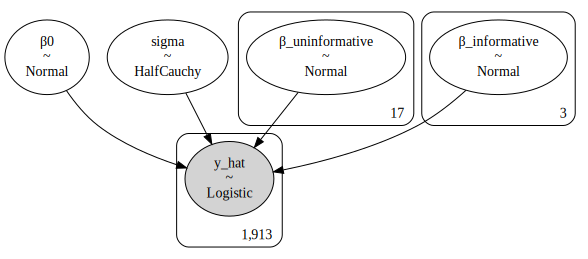

In [ ]:
pm.model_to_graphviz(full_model)

In [ ]:
# with full_model:
#     trace_main = pm.sample(1000, cores = 4, tune = 5000)

In [ ]:
# serialized = pickle.dumps(trace_main)
# filename = "pooled_main_trace"

# with open(filename, 'wb') as file_object:
  # file_object.write(serialized)

In [ ]:
filename = "pooled_main_trace"

with open(filename, 'rb') as file_object:
  raw_data = file_object.read()

trace_main = pickle.loads(raw_data)

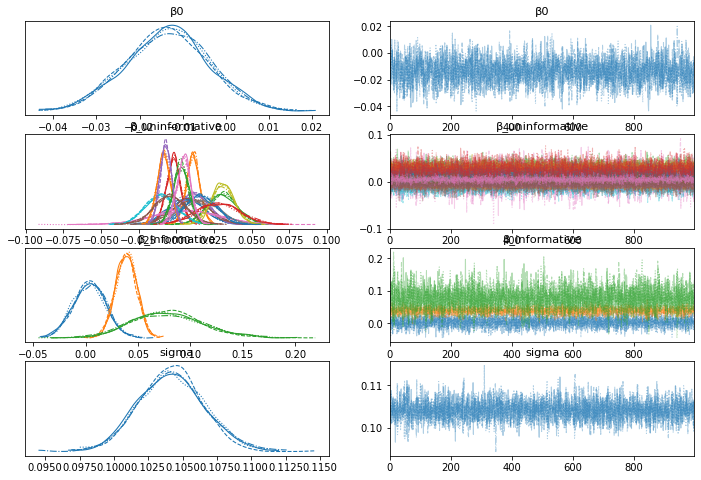

In [ ]:
with full_model:
    full_modelidata = az.from_pymc3(trace_main)
    pm.plot_trace(trace_main)


In [ ]:
az.summary(full_modelidata, round_to=2)

mean    sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
β0                  -0.01  0.01   -0.03  ...   2629.46   2726.25    1.0
β_uninformative[0]   0.01  0.01   -0.01  ...   2431.99   2545.18    1.0
β_uninformative[1]   0.01  0.00    0.00  ...   4730.69   3256.39    1.0
β_uninformative[2]   0.03  0.01    0.01  ...   4591.81   2949.24    1.0
β_uninformative[3]  -0.00  0.00   -0.01  ...   3603.04   2771.74    1.0
β_uninformative[4]   0.01  0.01   -0.01  ...   3829.81   2809.84    1.0
β_uninformative[5]   0.01  0.01   -0.01  ...   4499.56   3183.96    1.0
β_uninformative[6]   0.01  0.02   -0.03  ...   4497.16   2947.77    1.0
β_uninformative[7]   0.02  0.01   -0.01  ...   4257.36   2801.39    1.0
β_uninformative[8]   0.03  0.01    0.02  ...   4617.66   3185.08    1.0
β_uninformative[9]  -0.01  0.01   -0.03  ...   2512.35   2598.55    1.0
β_uninformative[10]  0.02  0.01   -0.00  ...   2576.88   2837.40    1.0
β_uninformative[11] -0.01  0.00   -0.02  ...   4676.67   3013.78    1.0
β_uninformative[12]  0.00  0.01   -0.01  ...   3566.91   2586.41    1.0
β_uninformative[13]  0.03  0.01   -0.00  ...   5212.46   2892.30    1.0
β_uninformative[14] -0.01  0.00   -0.01  ...   4958.29   3078.74    1.0
β_uninformative[15] -0.00  0.01   -0.02  ...   4847.57   3092.76    1.0
β_uninformative[16]  0.01  0.00   -0.00  ...   3501.53   2718.11    1.0
β_informative[0]     0.00  0.02   -0.03  ...   5148.98   2767.90    1.0
β_informative[1]     0.04  0.01    0.02  ...   5482.86   3112.54    1.0
β_informative[2]     0.08  0.03    0.01  ...   4520.10   2577.97    1.0
sigma                0.10  0.00    0.10  ...   4413.69   2794.92    1.0

[22 rows x 9 columns]

In [ ]:
with pm.Model() as reduced1_model: 

    #Model parameters
    β0 = pm.Normal('β0', mu=0, sd=1) #intercept
    β_uninformative = pm.Normal('β_uninformative', mu=0, sd=100, shape = 13) #Uninformative Priors
    
    # Use for BPQ080, MCQ160M, MCQ160N. Prior research shows that these are all very highly corellated with diabetes. 
    β_informative = pm.Normal('β_informative', mu=1, sd = 2, shape = 3) 
    
    sigma = pm.HalfCauchy('sigma', 5)
    logit = (β0 +  β_uninformative[0]*full_train['RIAGENDR'] 
            + β_uninformative[1]*full_train['RIDAGEYR'] 
            + β_uninformative[2]*full_train['BPQ020'] 
            + β_informative[0]*full_train['MCQ160M'] 
            + β_informative[1]*full_train['BPQ080'] 
            + β_uninformative[3]*full_train['DLQ100'] 
            + β_uninformative[4]*full_train['MCQ080'] 
            + β_uninformative[5]*full_train['MCQ160A'] 
            + β_informative[2]*full_train['MCQ160N'] 
            + β_uninformative[6]*full_train['MCQ220'] 
            + β_uninformative[7]*full_train['MCQ300A'] 
            + β_uninformative[8]*full_train['MCQ300C'] 
            + β_uninformative[9]*full_train['WHD020'] 
            + β_uninformative[10]*full_train['bmi'] 
            + β_uninformative[11]*full_train['LBXTC'] 
            + β_uninformative[12]*full_train['DXXAGRAT'] )

    y_hat = pm.Logistic("y_hat", logit, s=sigma, observed = observed_y)


In [ ]:
# with reduced1_model:
#     trace_reduced1 = pm.sample(1000, cores = 4, tune = 5000)

In [ ]:
# serialized = pickle.dumps(trace_reduced1)
# filename = "pooled_reduced1_trace"

# with open(filename, 'wb') as file_object:
#   file_object.write(serialized)

In [ ]:
filename = "pooled_reduced1_trace"

with open(filename, 'rb') as file_object:
  raw_data = file_object.read()

trace_reduced1 = pickle.loads(raw_data)

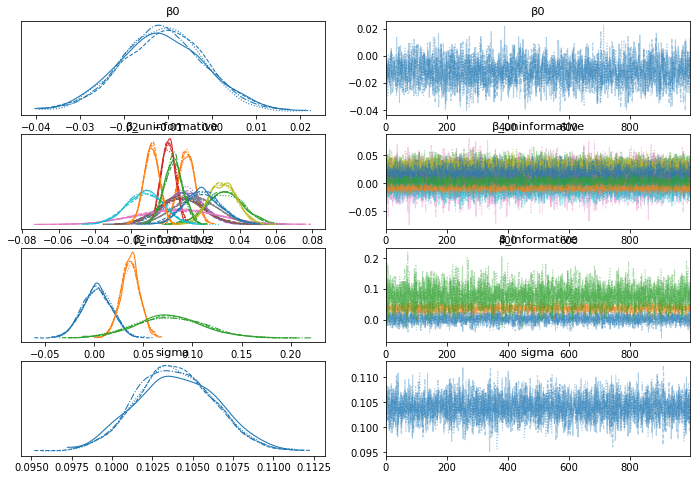

In [ ]:
with reduced1_model:
    reduced1_modelidata = az.from_pymc3(trace_reduced1)
    pm.plot_trace(trace_reduced1)

In [ ]:
with pm.Model() as reduced2_model: 


    #Model parameters
    β0 = pm.Normal('β0', mu=0, sd=1) #intercept
    β_uninformative = pm.Normal('β_uninformative', mu=0, sd=100, shape = 11) #Uninformative Priors
    β_informative = pm.Normal('β_informative', mu=1, sd = 2, shape = 3) # Use for BPQ080, MCQ160M, MCQ160N. Prior research shows that these are all very highly corellated with diabetes. 
    
    sigma = pm.HalfCauchy('sigma', 5)
    logit = (β0 +  β_uninformative[0]*full_train['RIAGENDR'] 
             + β_uninformative[1]*full_train['RIDAGEYR'] 
             + β_uninformative[2]*full_train['BPQ020'] 
             + β_informative[0]*full_train['MCQ160M'] 
             + β_informative[1]*full_train['BPQ080'] 
             + β_uninformative[3]*full_train['DLQ100'] 
             + β_uninformative[4]*full_train['MCQ080'] 
             + β_uninformative[5]*full_train['MCQ160A'] 
             + β_informative[2]*full_train['MCQ160N'] 
             + β_uninformative[6]*full_train['MCQ220'] 
             + β_uninformative[7]*full_train['MCQ300A'] 
             + β_uninformative[8]*full_train['MCQ300C'] 
             + β_uninformative[9]*full_train['bmi'] 
             + β_uninformative[10]*full_train['DXXAGRAT'])
    y_hat = pm.Logistic("y_hat", logit, s=sigma, observed = observed_y)


In [ ]:
# with reduced2_model:
#     trace_reduced2 = pm.sample(1000, cores = 4, tune = 5000)

In [ ]:
# serialized = pickle.dumps(trace_reduced2)
# filename = "pooled_reduced2_trace"

# with open(filename, 'wb') as file_object:
#   file_object.write(serialized)

In [ ]:
filename = "pooled_reduced2_trace"

with open(filename, 'rb') as file_object:
  raw_data = file_object.read()

trace_reduced2 = pickle.loads(raw_data)

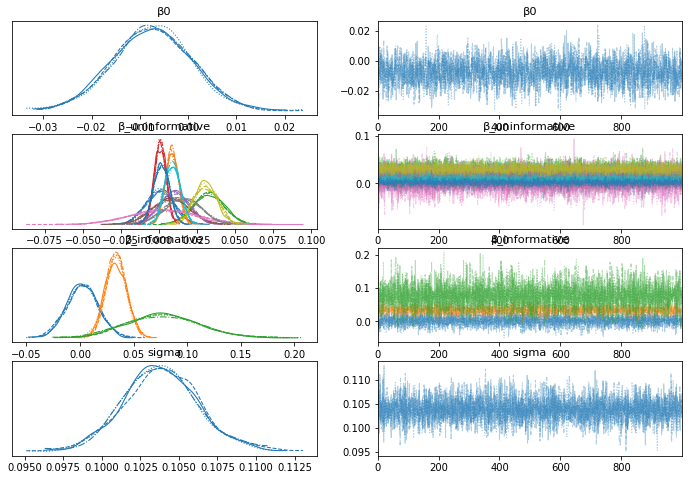

In [ ]:
with reduced2_model:
    reduced2_modelidata = az.from_pymc3(trace_reduced2)
    pm.plot_trace(trace_reduced2)

In [ ]:
with pm.Model() as reduced3_model: 


    #Model parameters
    β0 = pm.Normal('β0', mu=0, sd=1) #intercept
    β_uninformative = pm.Normal('β_uninformative', mu=0, sd=100, shape = 7) #Uninformative Priors
    β_informative = pm.Normal('β_informative', mu=1, sd = 2, shape = 3) # Use for BPQ080, MCQ160M, MCQ160N. Prior research shows that these are all very highly corellated with diabetes. 
    
    sigma = pm.HalfCauchy('sigma', 5)
    logit = (β0 +  β_uninformative[0]*full_train['RIAGENDR'] 
             + β_uninformative[1]*full_train['RIDAGEYR'] 
             + β_uninformative[2]*full_train['BPQ020'] 
             + β_informative[0]*full_train['MCQ160M'] 
             + β_informative[1]*full_train['BPQ080'] 
             + β_uninformative[3]*full_train['DLQ100'] 
             + β_informative[2]*full_train['MCQ160N'] 
             + β_uninformative[4]*full_train['MCQ300A'] 
             + β_uninformative[5]*full_train['MCQ300C'] 
             + β_uninformative[6]*full_train['bmi'])
    
    y_hat = pm.Logistic("y_hat", logit, s=sigma, observed = observed_y)

In [ ]:
# with reduced3_model:
#   trace_reduced3 = pm.sample(1000, cores = 4, tune = 5000)

In [ ]:
# serialized = pickle.dumps(trace_reduced3)
# filename = "pooled_reduced3_trace"

# with open(filename, 'wb') as file_object:
#   file_object.write(serialized)

In [ ]:
filename = "pooled_reduced3_trace"

with open(filename, 'rb') as file_object:
  raw_data = file_object.read()

trace_reduced3 = pickle.loads(raw_data)

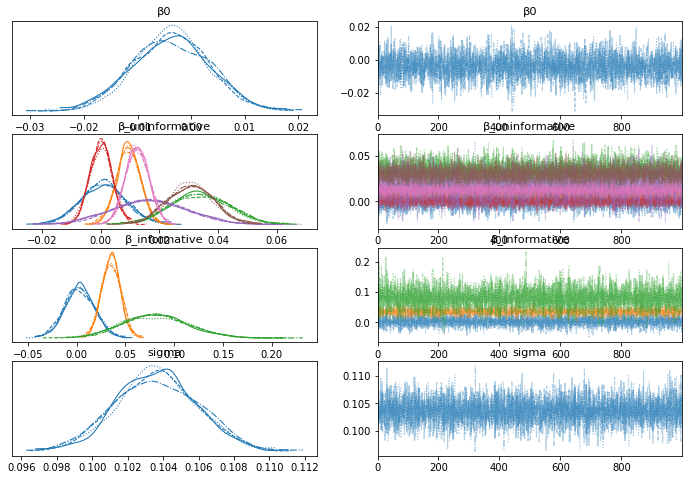

In [ ]:
with reduced3_model:
    reduced3_modelidata = az.from_pymc3(trace_reduced3)
    pm.plot_trace(trace_reduced3)
    

In [ ]:
az.summary(reduced3_modelidata, round_to=2)

mean    sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
β0                 -0.00  0.01   -0.02  ...   4218.69   3068.41    1.0
β_uninformative[0]  0.00  0.01   -0.01  ...   5192.87   2965.61    1.0
β_uninformative[1]  0.01  0.00    0.00  ...   6395.19   2974.37    1.0
β_uninformative[2]  0.03  0.01    0.02  ...   6773.63   3276.04    1.0
β_uninformative[3]  0.00  0.00   -0.01  ...   6050.92   3170.21    1.0
β_uninformative[4]  0.02  0.01   -0.01  ...   7438.34   2548.70    1.0
β_uninformative[5]  0.03  0.01    0.02  ...   6564.36   3458.85    1.0
β_uninformative[6]  0.01  0.00    0.01  ...   6951.43   3004.70    1.0
β_informative[0]    0.00  0.02   -0.03  ...   7710.59   2985.48    1.0
β_informative[1]    0.04  0.01    0.02  ...   6693.97   2921.64    1.0
β_informative[2]    0.08  0.03    0.02  ...   6771.89   2998.85    1.0
sigma               0.10  0.00    0.10  ...   6802.74   3048.80    1.0

[12 rows x 9 columns]

1 more reduced model, this time removing predictors that straddle 0

In [ ]:
with pm.Model() as reduced4_model: 


    #Model parameters
    β0 = pm.Normal('β0', mu=0, sd=1) #intercept
    β_uninformative = pm.Normal('β_uninformative', mu=0, sd=100, shape = 4) #Uninformative Priors
    β_informative = pm.Normal('β_informative', mu=1, sd = 2, shape = 2) # Use for BPQ080, MCQ160M, MCQ160N. Prior research shows that these are all very highly corellated with diabetes. 
    
    sigma = pm.HalfCauchy('sigma', 5)
    logit = (β0 + β_uninformative[0]*full_train['RIDAGEYR'] 
             + β_uninformative[1]*full_train['BPQ020'] 
             + β_informative[0]*full_train['BPQ080'] 
             + β_informative[1]*full_train['MCQ160N']  
             + β_uninformative[2]*full_train['MCQ300C'] 
             + β_uninformative[3]*full_train['bmi'])
    
    y_hat = pm.Logistic("y_hat", logit, s=sigma, observed = observed_y)

uninformative: 
BPQ020
RIDAGEYR
MCQ300C
bmi

informative: 
BPQ080
MCQ160N

In [ ]:
# with reduced4_model:
#   trace_reduced4 = pm.sample(1000, cores = 4, tune = 5000, random_seed = 55)

In [ ]:
# serialized = pickle.dumps(trace_reduced4)
# filename = "pooled_reduced4_trace"

# with open(filename, 'wb') as file_object:
#   file_object.write(serialized)

In [ ]:
filename = "pooled_reduced4_trace"

with open(filename, 'rb') as file_object:
  raw_data = file_object.read()

trace_reduced4 = pickle.loads(raw_data)

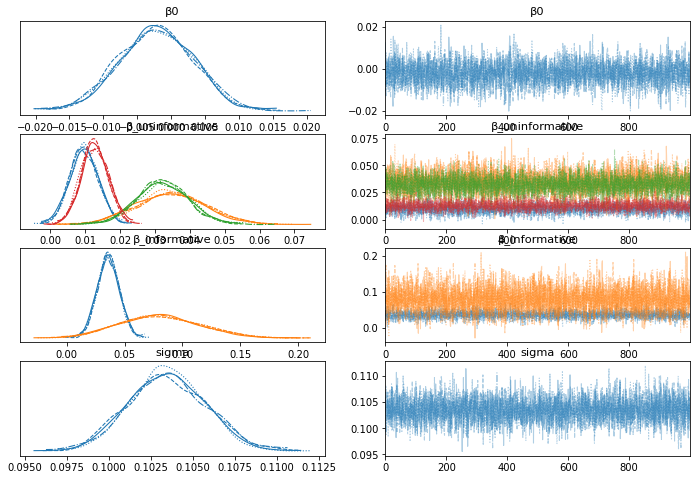

In [ ]:
with reduced4_model:
    reduced4_modelidata = az.from_pymc3(trace_reduced4)
    pm.plot_trace(trace_reduced4)
    

**WAIC Comparison Table**

In [ ]:
waic_df = az.compare({'full_model':trace_main, 'reduced_model1':trace_reduced1, 'reduced_model2': trace_reduced2, 'reduced_model3': trace_reduced3, 'reduced_model4': trace_reduced4}, ic = 'WAIC',
                    method='BB-pseudo-BMA')
waic_df

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using 

rank        waic     p_waic  ...       dse  warning  waic_scale
reduced_model4     0  125.709318  14.154970  ...  0.000000    False         log
reduced_model3     1  123.659134  16.110277  ...  1.200980    False         log
full_model         2  123.104021  22.204941  ...  3.893325    False         log
reduced_model1     3  121.992605  20.610909  ...  2.713363    False         log
reduced_model2     4  121.086475  19.004329  ...  1.705341    False         log

[5 rows x 9 columns]

From the WAIC analysis, we see that reduced_model4  is ranked the highest with a WAIC of 125.709318. So we use the following predictors for our pooled, unpooled, and hierarchical models:

UNINFORMATIVE

RIDAGEYR, BPQ020, MCQ300C, bmi

INFORMATIVE

BPQ080, MCQ160N

## Pooled Model:

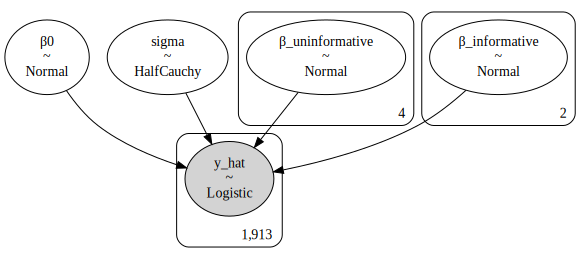

In [ ]:
pm.model_to_graphviz(reduced4_model)

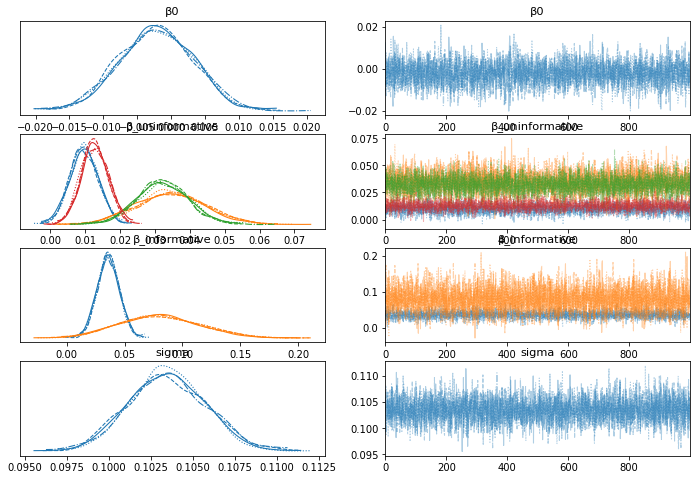

In [ ]:
with reduced4_model:
    reduced4_modelidata = az.from_pymc3(trace_reduced4)
    pm.plot_trace(trace_reduced4)


<Figure size 432x1080 with 0 Axes>

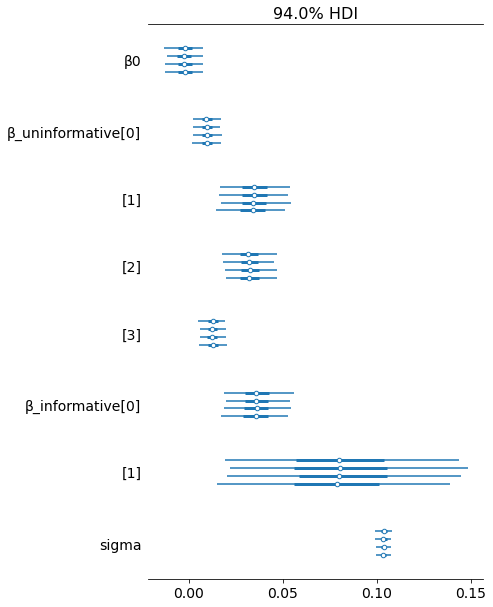

In [ ]:
with reduced4_model:
    plt.figure(figsize=(6,15))
    pm.plot_forest(trace_reduced4)

In [ ]:
az.summary(reduced4_modelidata, round_to=2)

mean    sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
β0                 -0.00  0.01   -0.01  ...   3327.61   2502.29    1.0
β_uninformative[0]  0.01  0.00    0.00  ...   3819.34   3014.32    1.0
β_uninformative[1]  0.03  0.01    0.02  ...   4396.38   2707.43    1.0
β_uninformative[2]  0.03  0.01    0.02  ...   3729.93   2767.00    1.0
β_uninformative[3]  0.01  0.00    0.01  ...   4218.14   3087.02    1.0
β_informative[0]    0.04  0.01    0.02  ...   4367.89   3063.07    1.0
β_informative[1]    0.08  0.03    0.02  ...   5075.57   3179.43    1.0
sigma               0.10  0.00    0.10  ...   5060.64   3501.14    1.0

[8 rows x 9 columns]

In [ ]:
with pm.Model() as pooled_model_prediction:  #prediction model

    #Model parameters
    β0 = pm.Normal('β0', mu=0, sd=1) #intercept
    β_uninformative = pm.Normal('β_uninformative', mu=0, sd=100, shape = 4) #Uninformative Priors
    β_informative = pm.Normal('β_informative', mu=1, sd = 2, shape = 2) # Use for BPQ080, MCQ160M, MCQ160N. Prior research shows that these are all very highly corellated with diabetes. 
    
    sigma = pm.HalfCauchy('sigma', 5)
    logit = (β0 +  β_uninformative[0]*full_test['RIDAGEYR'] 
             + β_uninformative[1]*full_test['BPQ020'] 
             + β_informative[0]*full_test['BPQ080'] 
             + β_informative[1]*full_test['MCQ160N'] 
             + β_uninformative[2]*full_test['MCQ300C'] 
             + β_uninformative[3]*full_test['bmi'])
    
    y_hat = pm.Logistic("y_hat", logit, s=sigma, observed = Y_test)


In [ ]:
pooled_model_logits = pm.sample_posterior_predictive_w(traces = [trace_reduced4], samples = 1000, models = [pooled_model_prediction], random_seed=55)

In [ ]:
pooled_logits = pooled_model_logits['y_hat'] # Specify whatever you've called the logistic regression equation in the model
pooled_odds = np.exp(pooled_logits)
pooled_probs = pooled_odds/(1+pooled_odds)
mean_pooled_probs = sum(pooled_probs)/1000

pooled_preds = [np.NaN] * len(Y_test)
for i in range(0,len(Y_test)):
    if mean_pooled_probs[i] >.5: # We can adjust this threshold
        pooled_preds[i] = 1
    else:
        pooled_preds[i] = 0
pooled_preds = pd.Series(pooled_preds)

Y_test = pd.DataFrame(Y_test)
Y_test = Y_test.reset_index(drop=True)
Y_test_ser = Y_test.squeeze()

print("Predictions:", pooled_preds)
print("Actual:", Y_test_ser)

Predictions: 0      1
1      1
2      1
3      1
4      1
      ..
474    0
475    1
476    1
477    1
478    1
Length: 479, dtype: int64
Actual: 0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
474    0.0
475    0.0
476    0.0
477    0.0
478    0.0
Name: DIQ010, Length: 479, dtype: float64


#### Pooled Confusion

In [ ]:
pooled_confusion = pd.crosstab(Y_test_ser, pooled_preds) # Predicted on columns, Actual is rows
pooled_confusion

col_0     0    1
DIQ010          
0.0     136  291
1.0       1   51

In [ ]:
TN = round(pooled_confusion[0][0]/(pooled_confusion[1][0]+pooled_confusion[0][0])*100, 2)
TP = round(pooled_confusion[1][1]/(pooled_confusion[1][1]+pooled_confusion[0][1])*100, 2)
FN = round(pooled_confusion[0][1]/(pooled_confusion[1][1]+pooled_confusion[0][1])*100, 2)
FP = round(pooled_confusion[1][0]/(pooled_confusion[1][0]+pooled_confusion[0][0])*100, 2)
print(f'True Negative Rate (Specificity): {TN}%')
print(f'True Positive Rate (Sensitivity): {TP}%')
print(f'False Negative Rate: {FN}% WE WANT TO AVOID FALSE NEGATIVES')
print(f'False Positive Rate: {FP}%')

True Negative Rate (Specificity): 31.85%
True Positive Rate (Sensitivity): 98.08%
False Negative Rate: 1.92% WE WANT TO AVOID FALSE NEGATIVES
False Positive Rate: 68.15%


In [ ]:
def get_samples(thing, num):
  empty = [np.NaN] * len(thing)
  for i in range(0, len(thing)):
    empty[i] = thing[i][num]
  return empty


**Hierarhical Model**

In [ ]:
n_uninf=7
idx_uninf=range(0,n_uninf)
#idx_uninf=list(range(0,n_uninf))

n_inf=3
idx_inf=range(0,n_inf)
#idx_inf=list(range(0,n_inf))


In [ ]:
rm4_test = full_test[["RIAGENDR", "RIDAGEYR", "BPQ020", "DLQ100", "MCQ300A", "MCQ300C", "bmi", "MCQ160M", "BPQ080", "MCQ160N", "RIDRETH3"]]
rm4_train = full_train[["RIAGENDR", "RIDAGEYR", "BPQ020", "DLQ100", "MCQ300A", "MCQ300C", "bmi", "MCQ160M", "BPQ080", "MCQ160N", "RIDRETH3"]]



races_test = rm4_test.RIDRETH3.unique()
num_race = len(races_test)
race_lookup = dict(zip(races_test, range(num_race)))
race_test = rm4_test.RIDRETH3.replace(race_lookup).values
race_test = race_test.astype('int64')




race_train = rm4_train.RIDRETH3.replace(race_lookup).values
race_train = race_train.astype('int64')


In [ ]:
print(race_lookup)

{1.0: 0, 4.0: 1, 2.0: 2, 3.0: 3, 6.0: 4, 7.0: 5}


## **Hierarchical Model**


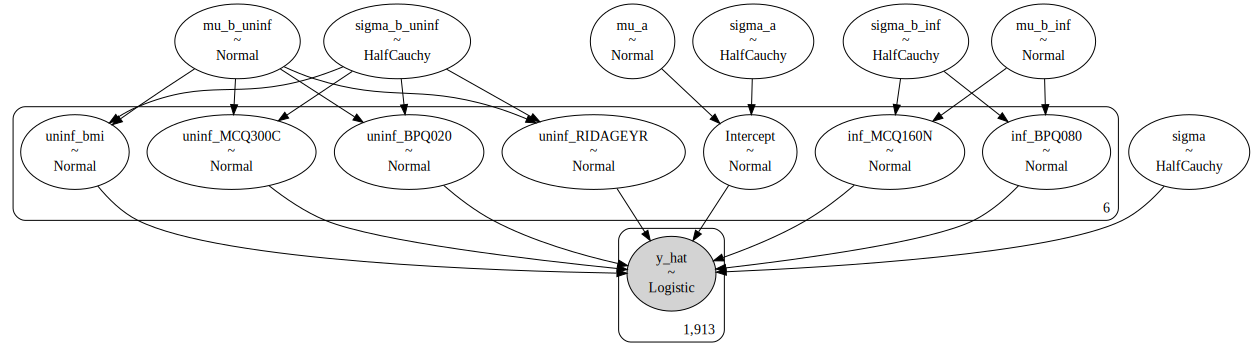

In [ ]:
with Model() as hierarch:
  mu_a = pm.Normal('mu_a', mu=0., sd=10e5)
  sigma_a = pm.HalfCauchy("sigma_a", beta = 10e5)

  mu_b_uninf = pm.Normal('mu_b_uninf', mu=0., sd=10e5) # Uninformed
  sigma_b_uninf =  pm.HalfCauchy('sigma_b_uninf', beta = 10e5) # Uninformed

  mu_b_inf = pm.Normal('mu_b_inf', mu=1., sd=2) # Informed
  sigma_b_inf =  pm.HalfCauchy('sigma_b_inf', beta = 10e5) # Uninformed, will not be below 0

  # Random intercepts
  a = pm.Normal('Intercept', mu=mu_a, sd=sigma_a, shape=num_race)

  # Random slopes
  # Uninformed
  uninf_BPQ020 = pm.Normal('uninf_BPQ020', mu=mu_b_uninf, sd=sigma_b_uninf, shape=num_race)
  uninf_RIDAGEYR = pm.Normal('uninf_RIDAGEYR', mu=mu_b_uninf, sd=sigma_b_uninf, shape=num_race)
  uninf_MCQ300C = pm.Normal('uninf_MCQ300C', mu=mu_b_uninf, sd=sigma_b_uninf, shape=num_race)
  uninf_bmi = pm.Normal('uninf_bmi', mu = mu_b_uninf, sd=sigma_b_uninf, shape=num_race)
  # Informed
  inf_BPQ080 = pm.Normal('inf_BPQ080', mu=mu_b_inf, sd=sigma_b_inf, shape=num_race)
  inf_MCQ160N = pm.Normal('inf_MCQ160N', mu=mu_b_inf, sd=sigma_b_inf, shape=num_race)


  # Expected value

  logit = (a[race_train] 
           + uninf_RIDAGEYR[race_train]*full_train["RIDAGEYR"].values
           + uninf_BPQ020[race_train]*full_train["BPQ020"].values
           + uninf_MCQ300C[race_train]*full_train["MCQ300C"].values
           + uninf_bmi[race_train]*full_train["bmi"].values
           + inf_BPQ080[race_train]*full_train["BPQ080"].values
           + inf_MCQ160N[race_train]*full_train["MCQ160N"].values)

  # Model error
  sigma_y = pm.HalfCauchy('sigma', 5)

  # Data likelihood
  y_hat = pm.Logistic('y_hat', logit, s=sigma_y, observed=observed_y.values)




pm.model_to_graphviz(hierarch)

In [ ]:
# # train trace here and save it - don't run everytime
# with hierarch:
#     hierarch_trace = pm.sample(1000, cores=4, tune=2000, target_accept= 0.99, random_seed=55)
#     hierarch_idata = az.from_pymc3(hierarch_trace)
    
# serialized = pickle.dumps(hierarch_trace)
# filename = "hierarchL_saveF"

# with open(filename, 'wb') as file_object:
#     file_object.write(serialized)
# az.summary(hierarch_idata, round_to=2)


In [ ]:
filename = "hierarchL_save"
with open(filename, 'rb') as file_object:
    raw_data = file_object.read()

hierarch_trace = pickle.loads(raw_data)

In [ ]:
az.summary(hierarch_trace, round_to=2)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean    sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
mu_a               0.01  0.01   -0.01  ...    547.28   1102.78   1.01
mu_b_uninf         0.02  0.00    0.01  ...    888.83   2374.68   1.01
mu_b_inf           0.06  0.03    0.01  ...    748.17    393.50   1.00
Intercept[0]       0.01  0.01   -0.01  ...    922.17   1818.30   1.00
Intercept[1]       0.01  0.01   -0.01  ...   1270.87   1847.40   1.00
Intercept[2]       0.01  0.01   -0.01  ...    933.82   2089.91   1.00
Intercept[3]       0.00  0.01   -0.01  ...    600.29   2036.20   1.01
Intercept[4]       0.01  0.01   -0.01  ...    905.38   2002.77   1.01
Intercept[5]       0.01  0.01   -0.01  ...    906.16   1556.32   1.00
uninf_BPQ020[0]    0.02  0.01    0.00  ...   2649.06   1621.68   1.01
uninf_BPQ020[1]    0.02  0.01    0.01  ...    295.73   1517.94   1.01
uninf_BPQ020[2]    0.02  0.01    0.00  ...   2841.91   1722.24   1.01
uninf_BPQ020[3]    0.02  0.01   -0.00  ...   3432.63   1966.46   1.01
uninf_BPQ020[4]    0.02  0.01    0.01  ...    698.58   2065.96   1.01
uninf_BPQ020[5]    0.02  0.01   -0.00  ...   3629.14   1471.32   1.02
uninf_RIDAGEYR[0]  0.01  0.01    0.00  ...   2165.99   1519.56   1.01
uninf_RIDAGEYR[1]  0.02  0.01    0.01  ...   1061.15   2821.38   1.01
uninf_RIDAGEYR[2]  0.02  0.01    0.01  ...   3999.52   2016.47   1.01
uninf_RIDAGEYR[3]  0.01  0.01   -0.00  ...    213.39   2273.01   1.02
uninf_RIDAGEYR[4]  0.02  0.01    0.00  ...   4242.14   1882.98   1.00
uninf_RIDAGEYR[5]  0.02  0.01    0.00  ...   4235.25   2355.93   1.01
uninf_MCQ300C[0]   0.02  0.01    0.00  ...   2846.33   1708.24   1.01
uninf_MCQ300C[1]   0.02  0.01    0.00  ...   2365.39   2079.21   1.00
uninf_MCQ300C[2]   0.02  0.01    0.01  ...    246.52   1395.21   1.02
uninf_MCQ300C[3]   0.02  0.01    0.00  ...   3712.04   1968.77   1.01
uninf_MCQ300C[4]   0.03  0.01    0.01  ...    173.87   1529.65   1.03
uninf_MCQ300C[5]   0.02  0.01   -0.00  ...   3171.16   1487.38   1.01
uninf_bmi[0]       0.02  0.01    0.00  ...   3224.70   2074.28   1.01
uninf_bmi[1]       0.02  0.01    0.00  ...   2920.54   2136.19   1.01
uninf_bmi[2]       0.01  0.01   -0.00  ...    926.56   1713.79   1.00
uninf_bmi[3]       0.01  0.01    0.00  ...    481.23   1582.58   1.01
uninf_bmi[4]       0.02  0.01    0.01  ...    221.35   1812.45   1.02
uninf_bmi[5]       0.02  0.01    0.00  ...   4328.43   1941.39   1.01
inf_BPQ080[0]      0.05  0.02    0.01  ...   4353.02   2883.28   1.00
inf_BPQ080[1]      0.05  0.02    0.01  ...   3756.54   2677.21   1.00
inf_BPQ080[2]      0.08  0.02    0.04  ...   1378.16   2172.04   1.00
inf_BPQ080[3]      0.01  0.02   -0.02  ...    716.45   1860.76   1.00
inf_BPQ080[4]      0.06  0.02    0.02  ...   3272.30   2819.36   1.00
inf_BPQ080[5]      0.03  0.03   -0.03  ...   2530.91   2578.80   1.00
inf_MCQ160N[0]     0.06  0.05   -0.03  ...   3468.16   1949.28   1.00
inf_MCQ160N[1]     0.13  0.12   -0.01  ...    513.80    351.42   1.01
inf_MCQ160N[2]     0.04  0.05   -0.07  ...   2833.18   1599.84   1.00
inf_MCQ160N[3]     0.06  0.04   -0.01  ...   2865.66   1960.93   1.00
inf_MCQ160N[4]     0.14  0.12   -0.00  ...    436.70    358.32   1.01
inf_MCQ160N[5]     0.04  0.05   -0.07  ...   1896.49   1017.00   1.00
sigma_a            0.01  0.01    0.00  ...    245.18    236.20   1.01
sigma_b_uninf      0.01  0.00    0.00  ...     61.76     55.95   1.07
sigma_b_inf        0.06  0.05    0.00  ...    315.84    367.00   1.01
sigma              0.10  0.00    0.10  ...   4825.35   2664.01   1.00

[49 rows x 9 columns]

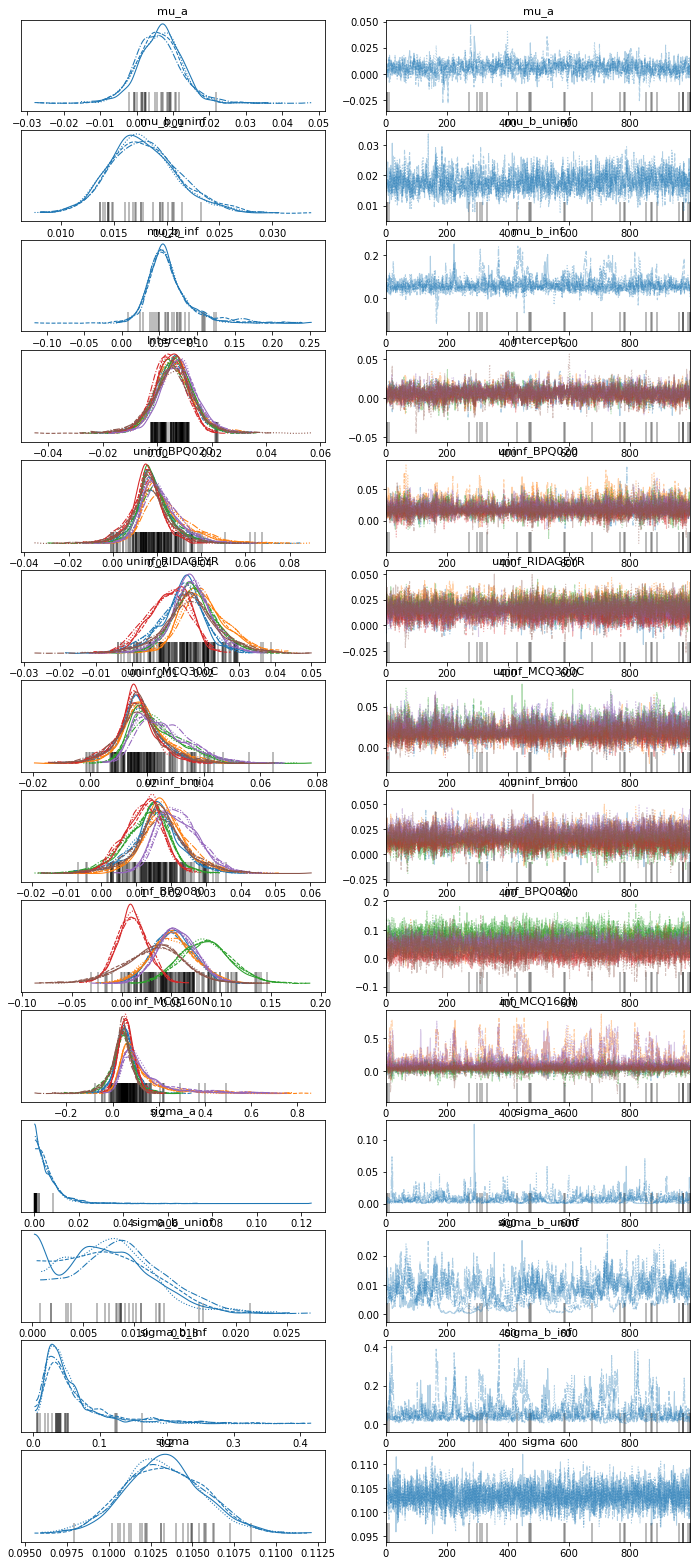

In [ ]:
with hierarch:
    pm.plot_trace(hierarch_trace)

<Figure size 432x1080 with 0 Axes>

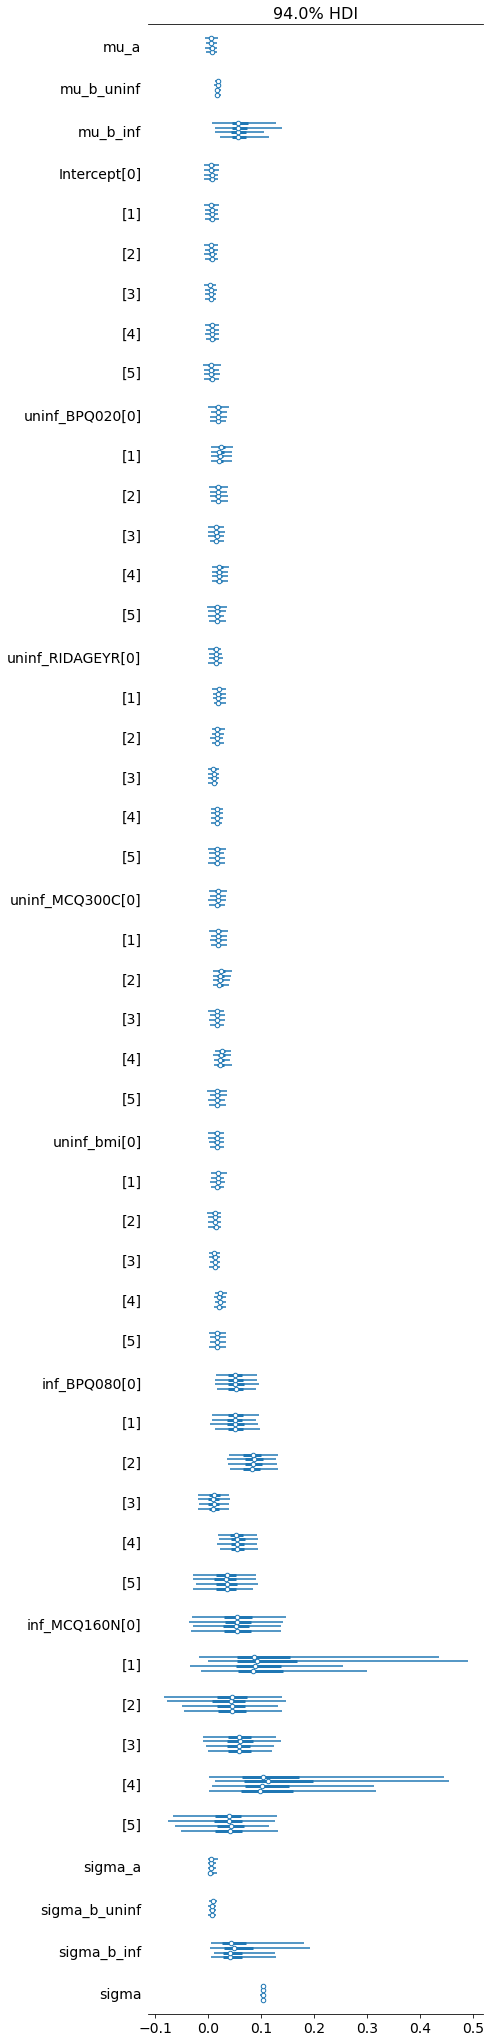

In [ ]:
with hierarch:
    plt.figure(figsize=(6,15))
    pm.plot_forest(hierarch_trace)

### **Hierarchical Prediction Model:**

In [ ]:
hiearch_preds = [np.NaN] * len(Y_test)

In [ ]:

with Model() as hierarch_prediction:
  mu_a = pm.Normal('mu_a', mu=0., sd=10e5)
  sigma_a = pm.HalfCauchy("sigma_a", beta = 10e5)

  mu_b_uninf = pm.Normal('mu_b_uninf', mu=0., sd=10e5) # Uninformed
  sigma_b_uninf =  pm.HalfCauchy('sigma_b_uninf', beta = 10e5) # Uninformed

  mu_b_inf = pm.Normal('mu_b_inf', mu=1., sd=2) # Informed
  sigma_b_inf =  pm.HalfCauchy('sigma_b_inf', beta = 10e5) # Uninformed, will not be below 0

  # Random intercepts
  a = pm.Normal('Intercept', mu=mu_a, sd=sigma_a, shape=num_race)

  # Random slopes
  # Uninformed
  uninf_BPQ020 = pm.Normal('uninf_BPQ020', mu=mu_b_uninf, sd=sigma_b_uninf, shape=num_race)
  uninf_RIDAGEYR = pm.Normal('uninf_RIDAGEYR', mu=mu_b_uninf, sd=sigma_b_uninf, shape=num_race)
  uninf_MCQ300C = pm.Normal('uninf_MCQ300C', mu=mu_b_uninf, sd=sigma_b_uninf, shape=num_race)
  uninf_bmi = pm.Normal('uninf_bmi', mu = mu_b_uninf, sd=sigma_b_uninf, shape=num_race)
  # Informed
  inf_BPQ080 = pm.Normal('inf_BPQ080', mu=mu_b_inf, sd=sigma_b_inf, shape=num_race)
  inf_MCQ160N = pm.Normal('inf_MCQ160N', mu=mu_b_inf, sd=sigma_b_inf, shape=num_race)


  # Expected value

  logit = (a[race_test] 
           + uninf_RIDAGEYR[race_test]*full_test["RIDAGEYR"].values
           + uninf_BPQ020[race_test]*full_test["BPQ020"].values
           + uninf_MCQ300C[race_test]*full_test["MCQ300C"].values
           + uninf_bmi[race_test]*full_test["bmi"].values
           + inf_BPQ080[race_test]*full_test["BPQ080"].values
           + inf_MCQ160N[race_test]*full_test["MCQ160N"].values)
  # Model error
  sigma_y = pm.HalfCauchy('sigma', 5)

  # Data likelihood
  y_hat = pm.Logistic('y_hat', logit, s=sigma_y, observed=hiearch_preds)



/usr/local/lib/python3.7/dist-packages/pymc3/model.py:1755: ImputationWarning: Data in y_hat contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [ ]:
hierarch_logitsi = pm.sample_posterior_predictive_w(traces = [hierarch_trace], samples = 1000, models = [hierarch_prediction], random_seed=55)

In [ ]:
hierarch_logitsi_y = hierarch_logitsi['y_hat'] # Specify whatever you've called the logistic regression equation in the model
hierarch_oddsi = np.exp(hierarch_logitsi_y)
hierarch_probsi = hierarch_oddsi/(1+hierarch_oddsi)
mean_hierarch_probsi = sum(hierarch_probsi)/1000

hierarch_predsi = [np.NaN] * len(Y_test)
for i in range(0,len(Y_test)):
    if mean_hierarch_probsi[i] >.5: # We can adjust this threshold
        hierarch_predsi[i] = 1
    else:
        hierarch_predsi[i] = 0
hierarch_predsi = pd.Series(hierarch_predsi)



print("Predictions:", hierarch_predsi)
print("Actual:", Y_test_ser)

Predictions: 0      1
1      1
2      1
3      1
4      1
      ..
474    1
475    1
476    1
477    1
478    1
Length: 479, dtype: int64
Actual: 0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
474    0.0
475    0.0
476    0.0
477    0.0
478    0.0
Name: DIQ010, Length: 479, dtype: float64


### Hierarchical Confusion Matrix 

In [ ]:
hierarch_confusioni = pd.crosstab(Y_test_ser, hierarch_predsi) # Predicted on columns, Actual is rows
hierarch_confusioni

col_0     0    1
DIQ010          
0.0     130  297
1.0       0   52

In [ ]:
TN = round(hierarch_confusioni[0][0]/(hierarch_confusioni[1][0]+hierarch_confusioni[0][0])*100, 2)
TP = round(hierarch_confusioni[1][1]/(hierarch_confusioni[1][1]+hierarch_confusioni[0][1])*100, 2)
FN = round(hierarch_confusioni[0][1]/(hierarch_confusioni[1][1]+hierarch_confusioni[0][1])*100, 2)
FP = round(hierarch_confusioni[1][0]/(hierarch_confusioni[1][0]+hierarch_confusioni[0][0])*100, 2)
print(f'True Negative Rate (Specificity): {TN}%')
print(f'True Positive Rate (Sensitivity): {TP}%')
print(f'False Negative Rate: {FN}% WE WANT TO AVOID FALSE NEGATIVES')
print(f'False Positive Rate: {FP}%')

True Negative Rate (Specificity): 30.44%
True Positive Rate (Sensitivity): 100.0%
False Negative Rate: 0.0% WE WANT TO AVOID FALSE NEGATIVES
False Positive Rate: 69.56%


## **Partially Pooled Model**

In [ ]:
rm4_test = full_test[["RIAGENDR", "RIDAGEYR", "BPQ020", "DLQ100", "MCQ300A", "MCQ300C", "bmi", "MCQ160M", "BPQ080", "MCQ160N", "RIDRETH3"]]
rm4_train = full_train[["RIAGENDR", "RIDAGEYR", "BPQ020", "DLQ100", "MCQ300A", "MCQ300C", "bmi", "MCQ160M", "BPQ080", "MCQ160N", "RIDRETH3"]]



races_test = rm4_test.RIDRETH3.unique()
num_race = len(races_test)
race_lookup_test = dict(zip(races_test, range(num_race)))
race_test = rm4_test.RIDRETH3.replace(race_lookup_test).values
race_test = race_test.astype('int64')




races_train = rm4_train.RIDRETH3.unique()
train_num_race = len(races_train)
race_lookup_train = dict(zip(races_train, range(train_num_race)))
race_train = rm4_train.RIDRETH3.replace(race_lookup_train).values
race_train = race_train.astype('int64')


In [ ]:
with pm.Model() as partially_pooled_model: 

    #Model parameters
    β0 = pm.Normal('β0', mu=0, sd=1, shape = train_num_race) #intercept
    β_uninformative = pm.Normal('β_uninformative', mu=0, sd=100, shape = 4) #Uninformative Priors
    β_informative = pm.Normal('β_informative', mu=1, sd = 2, shape = 2) # Use for BPQ080, MCQ160M, MCQ160N. Prior research shows that these are all very highly corellated with diabetes. 
    
    sigma = pm.HalfCauchy('sigma', 5)
    logit = (β0[race_train] + β_uninformative[0]*full_train['RIDAGEYR'] 
             + β_uninformative[1]*full_train['BPQ020'] 
             + β_informative[0]*full_train['BPQ080'] 
             + β_informative[1]*full_train['MCQ160N'] 
             + β_uninformative[2]*full_train['MCQ300C'] 
             + β_uninformative[3]*full_train['bmi'])
    
    y_hat = pm.Logistic("y_hat", logit, s=sigma, observed = observed_y)

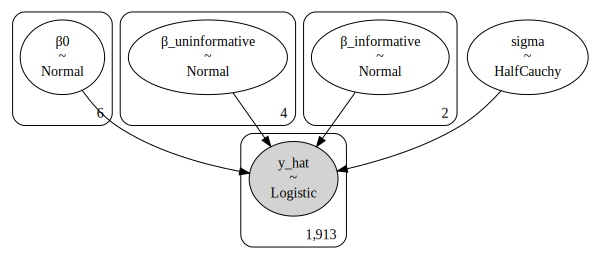

In [ ]:
pm.model_to_graphviz(partially_pooled_model)

In [ ]:
# with partially_pooled_model:
#     pp_trace = pm.sample(5000, cores = 4, tune=5000, random_seed=55)
#     pp_idata = az.from_pymc3(pp_trace)
    
# serialized = pickle.dumps(pp_trace)
# filename = "pp_trace_save"

# with open(filename, 'wb') as file_object:
#     file_object.write(serialized)


In [ ]:
filename = "pp_trace_save"
with open(filename, 'rb') as file_object:
    raw_data = file_object.read()

pp_trace = pickle.loads(raw_data)

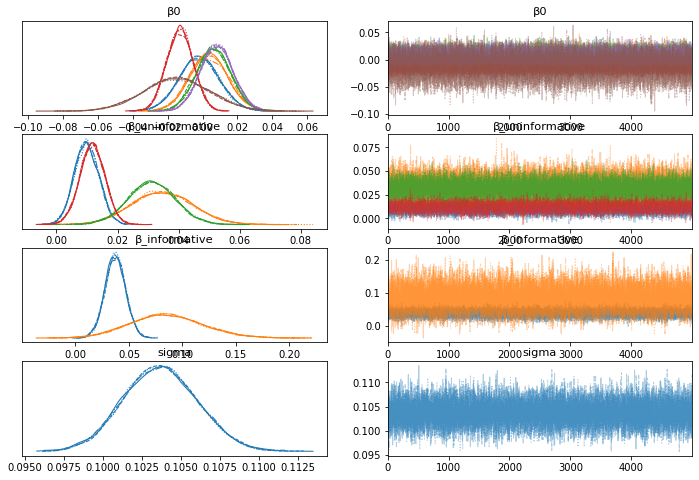

In [ ]:
with partially_pooled_model:
    pm.plot_trace(pp_trace)

<Figure size 432x1080 with 0 Axes>

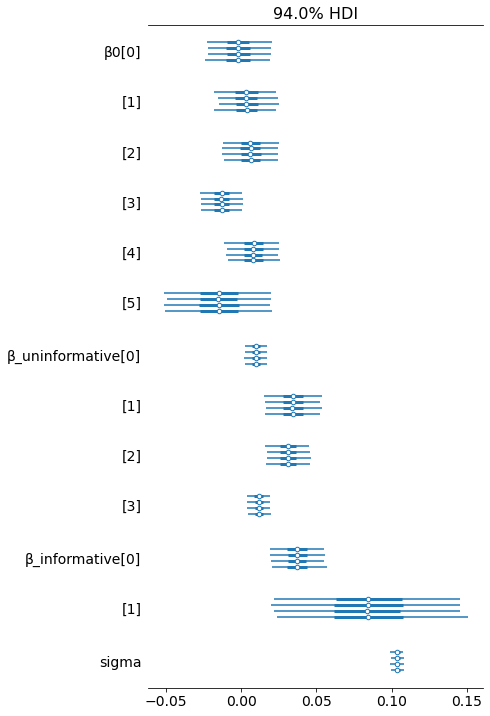

In [ ]:
with partially_pooled_model:
    plt.figure(figsize=(6,15))
    pm.plot_forest(pp_trace)

In [ ]:
pp_preds = [np.NaN] * len(Y_test)

### **Partially Pooled Prediction Model:**

In [ ]:
with pm.Model() as partially_pooled_model_prediction: 

    #Model parameters
    β0 = pm.Normal('β0', mu=0, sd=1, shape = num_race) #intercept
    β_uninformative = pm.Normal('β_uninformative', mu=0, sd=100, shape = 4) #Uninformative Priors
    β_informative = pm.Normal('β_informative', mu=1, sd = 2, shape = 2) # Use for BPQ080, MCQ160M, MCQ160N. Prior research shows that these are all very highly corellated with diabetes. 
    
    sigma = pm.HalfCauchy('sigma', 5)
    logit = (β0[race_test] + β_uninformative[0]*full_test['RIDAGEYR'] 
             + β_uninformative[1]*full_test['BPQ020'] 
             + β_informative[0]*full_test['BPQ080'] 
             + β_informative[1]*full_test['MCQ160N']  
             + β_uninformative[2]*full_test['MCQ300C'] 
             + β_uninformative[3]*full_test['bmi'])
    y_hat = pm.Logistic("y_hat", logit, s=sigma, observed = pp_preds)

/usr/local/lib/python3.7/dist-packages/pymc3/model.py:1755: ImputationWarning: Data in y_hat contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [ ]:
partially_pooled_model_logits = pm.sample_posterior_predictive_w(traces = [pp_trace], samples = 1000, models = [partially_pooled_model_prediction], random_seed=55)

In [ ]:
partially_pooled_model_logits = partially_pooled_model_logits['y_hat'] # Specify whatever you've called the logistic regression equation in the model
partially_pooled_odds = np.exp(partially_pooled_model_logits)  
partially_pooled_probs = partially_pooled_odds/(1+partially_pooled_odds) 
mean_ppooled_probs = sum(partially_pooled_probs)/1000

partially_pooled_preds = [np.NaN] * len(Y_test)
for i in range(0,len(Y_test)):
    if mean_ppooled_probs[i] >.5: # We can adjust this threshold
        partially_pooled_preds[i] = 1
    else:
        partially_pooled_preds[i] = 0
ppooled_preds = pd.Series(partially_pooled_preds)

print("Predictions:", ppooled_preds)
print("Actual:", Y_test)



Predictions: 0      1
1      1
2      1
3      1
4      1
      ..
474    0
475    1
476    1
477    1
478    1
Length: 479, dtype: int64
Actual:      DIQ010
0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
..      ...
474     0.0
475     0.0
476     0.0
477     0.0
478     0.0

[479 rows x 1 columns]


#### Partially Pooled Confusion Matrix:

In [ ]:
partially_pooled_model_confusion = pd.crosstab(Y_test_ser, ppooled_preds) # Predicted on columns, Actual is rows
partially_pooled_model_confusion 

col_0     0    1
DIQ010          
0.0     138  289
1.0       1   51

In [ ]:
TN = round(partially_pooled_model_confusion[0][0]/(partially_pooled_model_confusion[1][0]+partially_pooled_model_confusion[0][0])*100, 2)
TP = round(partially_pooled_model_confusion[1][1]/(partially_pooled_model_confusion[1][1]+partially_pooled_model_confusion[0][1])*100, 2)
FN = round(partially_pooled_model_confusion[0][1]/(partially_pooled_model_confusion [1][1]+partially_pooled_model_confusion [0][1])*100, 2)
FP = round(partially_pooled_model_confusion [1][0]/(partially_pooled_model_confusion [1][0]+partially_pooled_model_confusion [0][0])*100, 2)
print(f'True Negative Rate (Specificity): {TN}%')
print(f'True Positive Rate (Sensitivity): {TP}%')
print(f'False Negative Rate: {FN}% WE WANT TO AVOID FALSE NEGATIVES')
print(f'False Positive Rate: {FP}%')

True Negative Rate (Specificity): 32.32%
True Positive Rate (Sensitivity): 98.08%
False Negative Rate: 1.92% WE WANT TO AVOID FALSE NEGATIVES
False Positive Rate: 67.68%


## **Test Data Posterior Plots**

In [ ]:
race_list = X_test["RIDRETH3"] # Get test group race
real_val_list = Y_test["DIQ010"].tolist() # Get a list from array of real y values for test group


In [ ]:
index = pd.DataFrame(Y_test).reset_index()['index']
race_text = [np.NaN]*len(race_list)
race_listL = race_list.tolist()

In [ ]:
# Recoding Diabetic
y_test_text = [np.NaN]*len(Y_test)
for i in range(0, len(Y_test)):
  if real_val_list[i] == 0:
    y_test_text[i] = "Not Diabetic"
  else: 
    y_test_text[i] = "Diabetic"

In [ ]:
# Recoding race
for i in range(0, len(race_text)):
  if race_listL[i] == 1.0:
    race_text[i] = "Mexican American"
  elif race_listL[i] == 2.0:
    race_text[i] = "Other Hispanic"
  elif race_listL[i] == 3.0:
    race_text[i] = "Non-Hispanic White"
  elif race_listL[i] == 4.0:
    race_text[i] = "Non-Hispanic Black"
  elif race_listL[i] == 6.0:
    race_text[i] = "Non-Hispanic Asian"
  elif race_listL[i] == 7.0:
    race_text[i] = "Other Race - Including Multi-Racial"

## Pooled Posterior Plots:

In [ ]:
real_race_prob_pool = np.column_stack((Y_test, race_list, mean_pooled_probs)) # Put real values together with race and means
# Get data from list of sample runs to list of sample results per person
posterior_per_person_pooled = [np.NaN] * len(pooled_probs[0])
for i in range(0, len(pooled_probs[0])): # 479
  arr = np.array([np.NaN] * len(pooled_probs)) # 1000
  for j in range(0, len(pooled_probs)): # 1000
    arr[j] = pooled_probs[j][i]
  posterior_per_person_pooled[i] = arr
posterior_per_person_pooled = np.array(posterior_per_person_pooled)

In [ ]:
mult = len(posterior_per_person_pooled[0])
all_samples_pooled = pd.DataFrame()
for i in range(0, len(real_race_prob_pool)):
  index_i = index[i]
  all_samps_one_person = np.column_stack(((posterior_per_person_pooled[i]), np.array([index_i]*mult), np.array([race_text[i]]*mult), np.array([mean_pooled_probs[i]]*mult), np.array([y_test_text[i]]*mult)))
  pooled_df_one_person = pd.DataFrame(all_samps_one_person)
  all_samples_pooled = all_samples_pooled.append(pooled_df_one_person)


In [ ]:
all_samps_pooled_df = all_samples_pooled.rename(mapper=({0:"Sample Probability", 1:"ID", 2:"Race", 3:"Mean Probability", 4:"Diabetic"}), axis = 1)
all_samps_pooled_df = all_samps_pooled_df.reset_index()
all_samps_pooled_df["Sample Probability"] = all_samps_pooled_df["Sample Probability"].astype(float)

Text(0.5, 1.0, 'Pooled Posterior: Distribution of sampling results for two individuals')

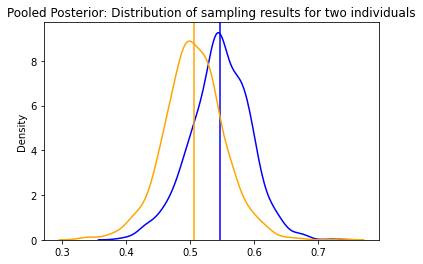

In [ ]:
# Plot of two individuals pooled
fig, ax = plt.subplots()
sns.kdeplot(posterior_per_person_pooled[60], ax=ax, color = "blue") # 60 is a diabetic
plt.axvline(x=mean_pooled_probs[60], color = "blue")
sns.kdeplot(posterior_per_person_pooled[0], ax=ax, color = "orange") # 0 is not a diabetic
plt.axvline(x=mean_pooled_probs[0], color = "orange")
plt.title(label = "Pooled Posterior: Distribution of sampling results for two individuals")

Text(0.5, 1.0, 'Pooled Posterior: Distribution of sampling results')

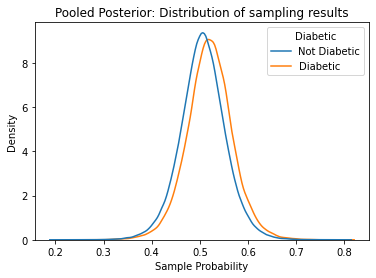

In [ ]:
# Plot of pooled diabetic vs not diabetic
fig, ax = plt.subplots()

# Diabetic
sns.kdeplot(all_samps_pooled_df["Sample Probability"], ax=ax, hue=all_samps_pooled_df["Diabetic"], common_norm=False) 


# Not Diabetic
#sns.kdeplot(not_diabetic_posteriors_pooled, ax=ax, color = "orange") 
#plt.axvline(x=mean_non_diabetic_pooled, color = "orange")

plt.title(label = "Pooled Posterior: Distribution of sampling results")

In [ ]:
diabetic_pooled = all_samps_pooled_df[all_samps_pooled_df["Diabetic"]=="Diabetic"] 
not_diabetic_pooled = all_samps_pooled_df[all_samps_pooled_df["Diabetic"]=="Not Diabetic"] 



In [ ]:
M_am = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Mexican American"]
O_hisp = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Other Hispanic"]
NH_white = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Non-Hispanic White"]
NH_black = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Non-Hispanic Black"]
NH_Asian = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Non-Hispanic Asian"]
OtherMR = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Other Race - Including Multi-Racial"]

In [ ]:
# Find diabetic & Non diabetic example for each race
OtherMR[OtherMR["Diabetic"]=="Not Diabetic"]

index  Sample Probability  ...    Mean Probability      Diabetic
23000       0            0.525189  ...  0.5141164064716197  Not Diabetic
23001       1            0.524515  ...  0.5141164064716197  Not Diabetic
23002       2            0.577501  ...  0.5141164064716197  Not Diabetic
23003       3            0.473859  ...  0.5141164064716197  Not Diabetic
23004       4            0.508554  ...  0.5141164064716197  Not Diabetic
...       ...                 ...  ...                 ...           ...
470995    995            0.549285  ...  0.5108702782665737  Not Diabetic
470996    996            0.522845  ...  0.5108702782665737  Not Diabetic
470997    997            0.541040  ...  0.5108702782665737  Not Diabetic
470998    998            0.540656  ...  0.5108702782665737  Not Diabetic
470999    999            0.525038  ...  0.5108702782665737  Not Diabetic

[22000 rows x 6 columns]

Text(0.5, 1.0, 'Pooled Posterior: Distribution of sampling results for Diabetics')

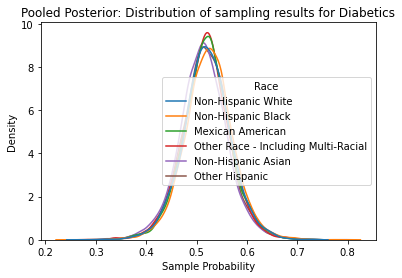

In [ ]:
# Plot of Diabetic Results by Race Pooled 
fig, ax = plt.subplots()

# Diabetic
sns.kdeplot(diabetic_pooled["Sample Probability"], ax=ax, hue=diabetic_pooled["Race"], common_norm=False) 


plt.title(label = "Pooled Posterior: Distribution of sampling results for Diabetics")

Text(0.5, 1.0, 'Pooled Posterior: Distribution of sampling results for non Diabetics')

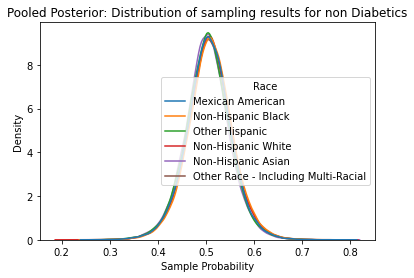

In [ ]:
# Plot of Not Diabetic Results by Race Pooled 
fig, ax = plt.subplots()

# Not Diabetic
sns.kdeplot(not_diabetic_pooled["Sample Probability"], ax=ax, hue=not_diabetic_pooled["Race"], common_norm=False) 

plt.title(label = "Pooled Posterior: Distribution of sampling results for non Diabetics")

#### Partially Pooled Plots:


In [ ]:
real_race_prob_pp = np.column_stack((Y_test, race_list, mean_ppooled_probs)) # Put real values together with race and means
# Get data from list of sample runs to list of sample results per person
posterior_per_person_pp = [np.NaN] * len(partially_pooled_probs[0])
for i in range(0, len(partially_pooled_probs[0])): # 479
  arr = np.array([np.NaN] * len(partially_pooled_probs)) # 1000
  for j in range(0, len(partially_pooled_probs)): # 1000
    arr[j] = partially_pooled_probs[j][i]
  posterior_per_person_pp[i] = arr
posterior_per_person_pp = np.array(posterior_per_person_pp)

In [ ]:
mult = len(posterior_per_person_pp[0])
all_samples_pp = pd.DataFrame()
for i in range(0, len(real_race_prob_pp)):
  index_i = index[i]
  all_samps_one_person = (np.column_stack(((posterior_per_person_pp[i]), 
                                           np.array([index_i]*mult), 
                                           np.array([race_text[i]]*mult), 
                                           np.array([mean_ppooled_probs[i]]*mult), 
                                           np.array([y_test_text[i]]*mult))))
  pp_df_one_person = pd.DataFrame(all_samps_one_person)
  all_samples_pp = all_samples_pp.append(pp_df_one_person)


In [ ]:
pd.DataFrame(all_samps_one_person)

0    1  ...                   3             4
0     0.5356864856690935  478  ...  0.5024402661653974  Not Diabetic
1    0.46755529748273417  478  ...  0.5024402661653974  Not Diabetic
2     0.5331777566658198  478  ...  0.5024402661653974  Not Diabetic
3     0.5055915324949781  478  ...  0.5024402661653974  Not Diabetic
4    0.47074957526692623  478  ...  0.5024402661653974  Not Diabetic
..                   ...  ...  ...                 ...           ...
995   0.4873225774801829  478  ...  0.5024402661653974  Not Diabetic
996  0.48759778132699283  478  ...  0.5024402661653974  Not Diabetic
997   0.5262817825063841  478  ...  0.5024402661653974  Not Diabetic
998   0.4518845794296453  478  ...  0.5024402661653974  Not Diabetic
999   0.4736001584969059  478  ...  0.5024402661653974  Not Diabetic

[1000 rows x 5 columns]

In [ ]:
all_samps_pp_df = (all_samples_pp.rename(mapper=({0:"Sample Probability", 
                                                  1:"ID", 
                                                  2:"Race", 
                                                  3:"Mean Probability", 
                                                  4:"Diabetic"}), axis = 1))
all_samps_pp_df = all_samps_pp_df.reset_index()
all_samps_pp_df["Sample Probability"] = all_samps_pp_df["Sample Probability"].astype(float)

Text(0.5, 1.0, 'Partially Pooled Posterior: Distribution of sampling results')

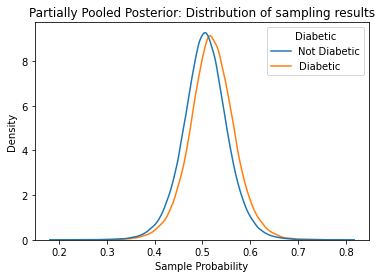

In [ ]:
# Plot of partially pooled diabetic vs not diabetic
fig, ax = plt.subplots()

# Diabetic
sns.kdeplot(all_samps_pp_df["Sample Probability"], ax=ax, hue=all_samps_pp_df["Diabetic"], common_norm=False) 


# Not Diabetic
#sns.kdeplot(not_diabetic_posteriors_pooled, ax=ax, color = "orange") 
#plt.axvline(x=mean_non_diabetic_pooled, color = "orange")

plt.title(label = "Partially Pooled Posterior: Distribution of sampling results")

In [ ]:
diabetic_pp = all_samps_pp_df[all_samps_pp_df["Diabetic"]=="Diabetic"] 
not_diabetic_pp = all_samps_pp_df[all_samps_pp_df["Diabetic"]=="Not Diabetic"] 

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Partially Pooled Posterior: Distribution of sampling results for Diabetics')

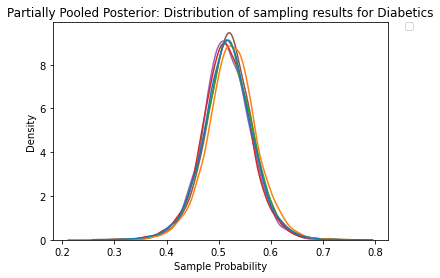

In [ ]:
# Plot of Diabetic Results by Race Partially Pooled 
fig, ax = plt.subplots()

# Diabetic
sns.kdeplot(diabetic_pp["Sample Probability"], ax=ax, hue=diabetic_pp["Race"], common_norm=False) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) # This just gets rid of the legend for some reason?

plt.title(label = "Partially Pooled Posterior: Distribution of sampling results for Diabetics")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Partially Pooled Posterior: Distribution of sampling results for non-Diabetics')

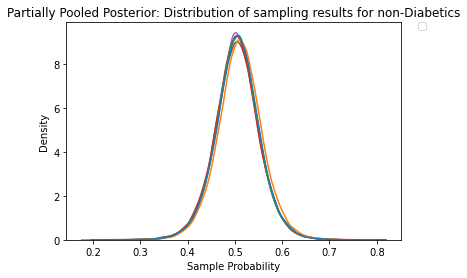

In [ ]:
# Plot of Not Diabetic Results by Race Partially Pooled 
fig, ax = plt.subplots()

# Not Diabetic
sns.kdeplot(not_diabetic_pp["Sample Probability"], ax=ax, hue=not_diabetic_pp["Race"], common_norm=False) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) # This just gets rid of the legend for some reason?
plt.title(label = "Partially Pooled Posterior: Distribution of sampling results for non-Diabetics")

#### Hierarchichal Plots:

In [ ]:
real_race_prob_hi = np.column_stack((Y_test, race_list, mean_hierarch_probsi)) # Put real values together with race and means
# Get data from list of sample runs to list of sample results per person
posterior_per_person_hi = [np.NaN] * len(hierarch_probsi[0])
for i in range(0, len(hierarch_probsi[0])): # 479
  arr = np.array([np.NaN] * len(hierarch_probsi)) # 1000
  for j in range(0, len(hierarch_probsi)): # 1000
    arr[j] = hierarch_probsi[j][i]
  posterior_per_person_hi[i] = arr
posterior_per_person_hi = np.array(posterior_per_person_hi)

In [ ]:
mult = len(posterior_per_person_hi[0])
all_samples_hi = pd.DataFrame()
for i in range(0, len(real_race_prob_hi)):
  index_i = index[i]
  all_samps_one_person = (np.column_stack(((posterior_per_person_hi[i]), 
                                           np.array([index_i]*mult), 
                                           np.array([race_text[i]]*mult), 
                                           np.array([mean_hierarch_probsi[i]]*mult), 
                                           np.array([y_test_text[i]]*mult))))
  h_df_one_personi = pd.DataFrame(all_samps_one_person)
  all_samples_hi = all_samples_hi.append(h_df_one_personi)


In [ ]:
all_samps_hi_df = (all_samples_hi.rename(mapper=({0:"Sample Probability", 
                                                  1:"ID", 
                                                  2:"Race", 
                                                  3:"Mean Probability", 
                                                  4:"Diabetic"}), axis = 1))
all_samps_hi_df = all_samps_hi_df.reset_index()
all_samps_hi_df["Sample Probability"] = all_samps_hi_df["Sample Probability"].astype(float)

Text(0.5, 1.0, 'Hierarchical Posterior: Distribution of sampling results')

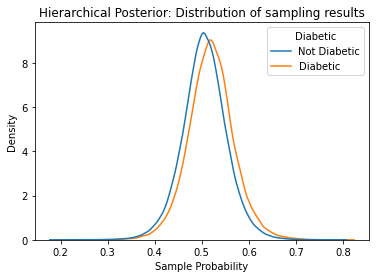

In [ ]:
# Plot of hierarchichal pooled diabetic vs not diabetic
fig, ax = plt.subplots()

# Diabetic
sns.kdeplot(all_samps_hi_df["Sample Probability"], ax=ax, hue=all_samps_hi_df["Diabetic"], common_norm=False) 


# Not Diabetic
#sns.kdeplot(not_diabetic_posteriors_pooled, ax=ax, color = "orange") 
#plt.axvline(x=mean_non_diabetic_pooled, color = "orange")

plt.title(label = "Hierarchical Posterior: Distribution of sampling results")

In [ ]:
diabetic_hi = all_samps_hi_df[all_samps_hi_df["Diabetic"]=="Diabetic"] 
not_diabetic_hi = all_samps_hi_df[all_samps_hi_df["Diabetic"]=="Not Diabetic"] 

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Hierarchical: Distribution of sampling results for Diabetics')

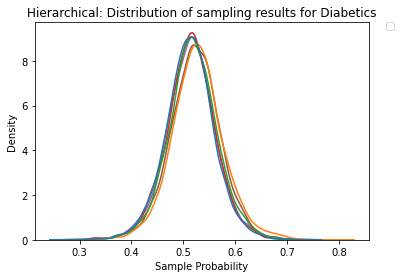

In [ ]:
# Plot of Diabetic Results by Race Hierarhical
fig, ax = plt.subplots()

# Diabetic
sns.kdeplot(diabetic_hi["Sample Probability"], ax=ax, hue=diabetic_hi["Race"], common_norm=False) 

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) # This just gets rid of the legend for some reason?
plt.title(label = "Hierarchical: Distribution of sampling results for Diabetics")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Hierarchical: Distribution of sampling results for non Diabetics')

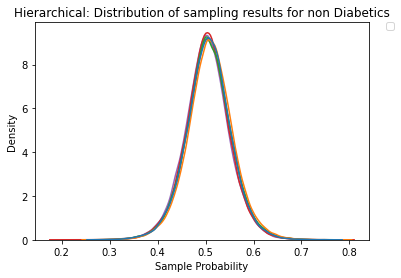

In [ ]:
# Plot of Not Diabetic Results by Race Hierarhichal 
fig, ax = plt.subplots()

# Not Diabetic
sns.kdeplot(not_diabetic_hi["Sample Probability"], ax=ax, hue=not_diabetic_hi["Race"], common_norm=False) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) # This just gets rid of the legend for some reason?
plt.title(label = "Hierarchical: Distribution of sampling results for non Diabetics")

## **Final WAIC Analysis:**

In [ ]:
waic_df2 = az.compare({'pooled_model':trace_reduced4, 'hierarchical_model': hierarch_trace, 'partially_pooled_model': pp_trace}, ic = 'WAIC',
                    method='BB-pseudo-BMA')
waic_df2

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1460: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. Thi

rank        waic  ...  warning  waic_scale
hierarchical_model         0  127.828069  ...     True         log
pooled_model               1  125.709318  ...    False         log
partially_pooled_model     2  125.327283  ...    False         log

[3 rows x 9 columns]

### Joint Plots for Individual Posteriors:

Text(0.5, 1.0, 'Distribution of sampling results for one random respondent')

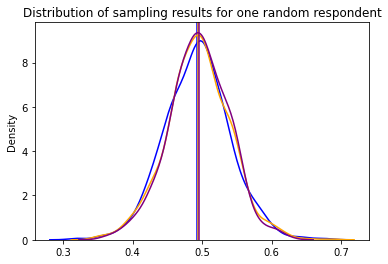

In [ ]:

fig, ax = plt.subplots()
sns.kdeplot(posterior_per_person_pp[13], ax=ax, color = "blue") # Partially pooled
plt.axvline(x=mean_ppooled_probs[13], color = "blue")
sns.kdeplot(posterior_per_person_pooled[13], ax=ax, color = "orange") # pooled
plt.axvline(x=mean_pooled_probs[13], color = "orange")
sns.kdeplot(posterior_per_person_hi[13], ax=ax, color = "purple") # hierarch orig
plt.axvline(x=mean_hierarch_probsi[13], color = "purple")
plt.title(label = "Distribution of sampling results for one random respondent")

### Standard Deviations for Individuals: 

In [ ]:
# Mexican, Diabetic
print(np.std(posterior_per_person_pooled[13]))
print(np.std(posterior_per_person_pp[13]))
print(np.std(posterior_per_person_hi[13]))

0.04588962651825273
0.047263443245971204
0.04323089973108267


### Mean & Standard Deviation of Segments Per Group:

In [ ]:
M_amP = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Mexican American"]
O_hispP = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Other Hispanic"]
NH_whiteP = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Non-Hispanic White"]
NH_blackP = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Non-Hispanic Black"]
NH_AsianP = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Non-Hispanic Asian"]
OtherMRP = all_samps_pooled_df[all_samps_pooled_df["Race"] == "Other Race - Including Multi-Racial"]

M_amPP = all_samps_pp_df[all_samps_pp_df["Race"] == "Mexican American"]
O_hispPP = all_samps_pp_df[all_samps_pp_df["Race"] == "Other Hispanic"]
NH_whitePP = all_samps_pp_df[all_samps_pp_df["Race"] == "Non-Hispanic White"]
NH_blackPP = all_samps_pp_df[all_samps_pp_df["Race"] == "Non-Hispanic Black"]
NH_AsianPP = all_samps_pp_df[all_samps_pp_df["Race"] == "Non-Hispanic Asian"]
OtherMRPP = all_samps_pp_df[all_samps_pp_df["Race"] == "Other Race - Including Multi-Racial"]

M_amHi = all_samps_hi_df[all_samps_hi_df["Race"] == "Mexican American"]
O_hispHi = all_samps_hi_df[all_samps_hi_df["Race"] == "Other Hispanic"]
NH_whiteHi = all_samps_hi_df[all_samps_hi_df["Race"] == "Non-Hispanic White"]
NH_blackHi = all_samps_hi_df[all_samps_hi_df["Race"] == "Non-Hispanic Black"]
NH_AsianHi = all_samps_hi_df[all_samps_hi_df["Race"] == "Non-Hispanic Asian"]
OtherMRHi = all_samps_hi_df[all_samps_hi_df["Race"] == "Other Race - Including Multi-Racial"]

In [ ]:
def std_and_mean(df, dstat):
  tt = df[df["Diabetic"]== dstat]
  stdev = np.std(tt["Sample Probability"])
  mn = np.mean(tt["Sample Probability"])
  print(f"Standard Deviation: {stdev}")
  print(f"Mean: {mn}")

In [ ]:
print("Pooled")
std_and_mean(M_amP, "Diabetic")
std_and_mean(M_amP, "Not Diabetic")
print()
print("PartialPool")
std_and_mean(M_amPP, "Diabetic")
std_and_mean(M_amPP, "Not Diabetic")
print()
print("Hierarchical")
std_and_mean(M_amHi, "Diabetic")
std_and_mean(M_amHi, "Not Diabetic")

Pooled
Standard Deviation: 0.047057327400854713
Mean: 0.5205815894000345
Standard Deviation: 0.04707018948471835
Mean: 0.505785547269162

PartialPool
Standard Deviation: 0.048183753051623236
Mean: 0.5192542442495142
Standard Deviation: 0.04720870467068924
Mean: 0.505885331402378

Hierarchical
Standard Deviation: 0.04809520845378546
Mean: 0.5186947956235516
Standard Deviation: 0.04730102487445248
Mean: 0.5064740110432676


In [ ]:
print("Pooled")
std_and_mean(O_hispP, "Diabetic")
std_and_mean(O_hispP, "Not Diabetic")
print()
print("PartialPool")
std_and_mean(O_hispPP, "Diabetic")
std_and_mean(O_hispPP, "Not Diabetic")
print()
print("Hierarchical")
std_and_mean(O_hispHi, "Diabetic")
std_and_mean(O_hispHi, "Not Diabetic")

Pooled
Standard Deviation: 0.047456538145215436
Mean: 0.5180514133653635
Standard Deviation: 0.04732442279489091
Mean: 0.503565157802677

PartialPool
Standard Deviation: 0.046851850153796
Mean: 0.51966472144817
Standard Deviation: 0.04690639429853689
Mean: 0.5053566212181406

Hierarchical
Standard Deviation: 0.04853478417016101
Mean: 0.5232470178770592
Standard Deviation: 0.04784077379059988
Mean: 0.5066080110922355


In [ ]:
print("Pooled")
std_and_mean(NH_whiteP, "Diabetic")
std_and_mean(NH_whiteP, "Not Diabetic")
print()
print("PartialPool")
std_and_mean(NH_whitePP, "Diabetic")
std_and_mean(NH_whitePP, "Not Diabetic")
print()
print("Hierarchical")
std_and_mean(NH_whiteHi, "Diabetic")
std_and_mean(NH_whiteHi, "Not Diabetic")

Pooled
Standard Deviation: 0.04799764626557378
Mean: 0.520587037985105
Standard Deviation: 0.04747001483283306
Mean: 0.5065930884909604

PartialPool
Standard Deviation: 0.048406025969032554
Mean: 0.5175116194770318
Standard Deviation: 0.047487389143239675
Mean: 0.5039840576433966

Hierarchical
Standard Deviation: 0.04702678838740147
Mean: 0.5129578848231542
Standard Deviation: 0.046810649358976046
Mean: 0.5042594492627027


In [ ]:
print("Pooled")
std_and_mean(NH_blackP, "Diabetic")
std_and_mean(NH_blackP, "Not Diabetic")
print()
print("PartialPool")
std_and_mean(NH_blackPP, "Diabetic")
std_and_mean(NH_blackPP, "Not Diabetic")
print()
print("Hierarchical")
std_and_mean(NH_blackHi, "Diabetic")
std_and_mean(NH_blackHi, "Not Diabetic")

Pooled
Standard Deviation: 0.04843883886312566
Mean: 0.524259060011417
Standard Deviation: 0.04749855436375104
Mean: 0.5092894891194744

PartialPool
Standard Deviation: 0.048182717232540646
Mean: 0.5258479603801564
Standard Deviation: 0.0479408379794373
Mean: 0.5108335666356478

Hierarchical
Standard Deviation: 0.05099671939544581
Mean: 0.5282518533161131
Standard Deviation: 0.04802849520646418
Mean: 0.5103535023299339


In [ ]:
print("Pooled")
std_and_mean(NH_AsianP, "Diabetic")
std_and_mean(NH_AsianP, "Not Diabetic")
print()
print("PartialPool")
std_and_mean(NH_AsianPP, "Diabetic")
std_and_mean(NH_AsianPP, "Not Diabetic")
print()
print("Hierarchical")
std_and_mean(NH_AsianHi, "Diabetic")
std_and_mean(NH_AsianHi, "Not Diabetic")

Pooled
Standard Deviation: 0.048318872078723825
Mean: 0.5132617910360876
Standard Deviation: 0.046741021832319124
Mean: 0.5022882829220809

PartialPool
Standard Deviation: 0.0466124735137263
Mean: 0.5148578561849948
Standard Deviation: 0.04733900657202986
Mean: 0.504615805639036

Hierarchical
Standard Deviation: 0.0482060254042968
Mean: 0.5149985567846933
Standard Deviation: 0.04726686160734472
Mean: 0.5027427073538223


In [ ]:
print("Pooled")
std_and_mean(OtherMRP, "Diabetic")
std_and_mean(OtherMRP, "Not Diabetic")
print()
print("PartialPool")
std_and_mean(OtherMRPP, "Diabetic")
std_and_mean(OtherMRPP, "Not Diabetic")
print()
print("Hierarchical")
std_and_mean(OtherMRHi, "Diabetic")
std_and_mean(OtherMRHi, "Not Diabetic")

Pooled
Standard Deviation: 0.047286111253402686
Mean: 0.5184393936840609
Standard Deviation: 0.047643374826076224
Mean: 0.5071871045714919

PartialPool
Standard Deviation: 0.047252861674488285
Mean: 0.5147679860565324
Standard Deviation: 0.047805043464952665
Mean: 0.5040698594705374

Hierarchical
Standard Deviation: 0.047458983185330976
Mean: 0.5145103132084018
Standard Deviation: 0.04799867087113025
Mean: 0.5061143859335249


## **Credible Intervals**


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba9b48f790>,
      dtype=object)

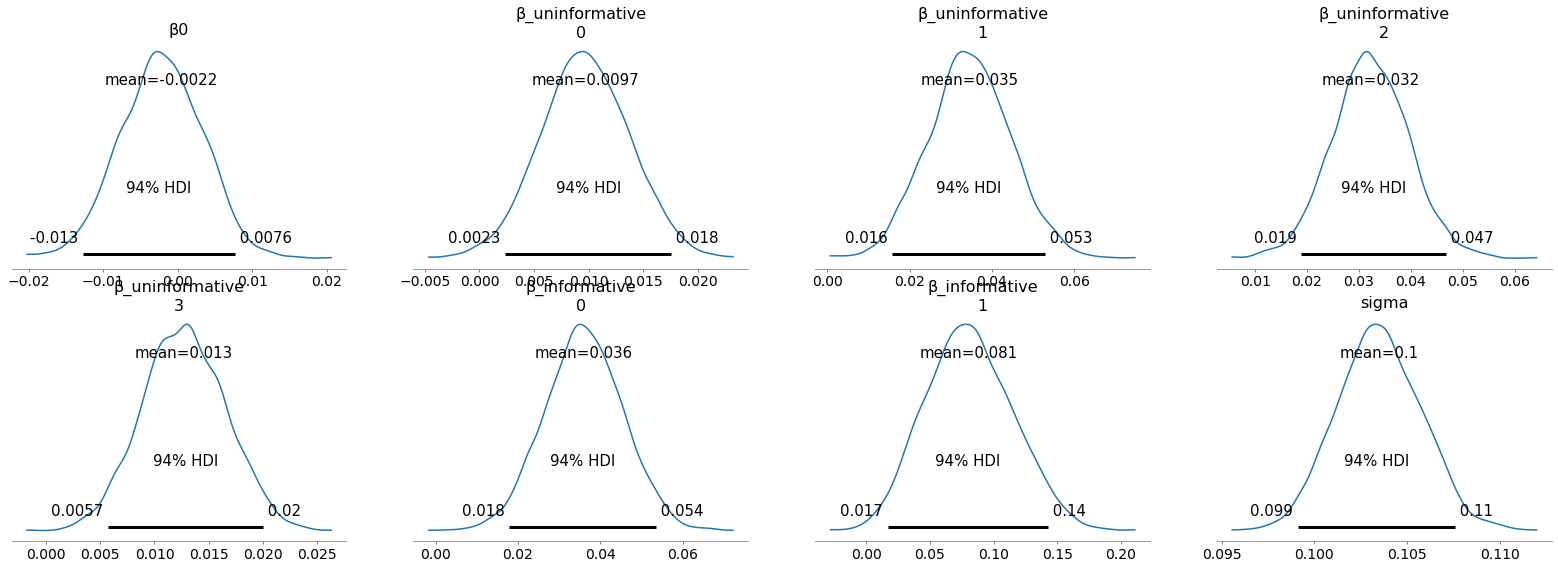

In [ ]:
az.plot_posterior(trace_reduced4)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba9b3e5cd0>,
      dtype=object)

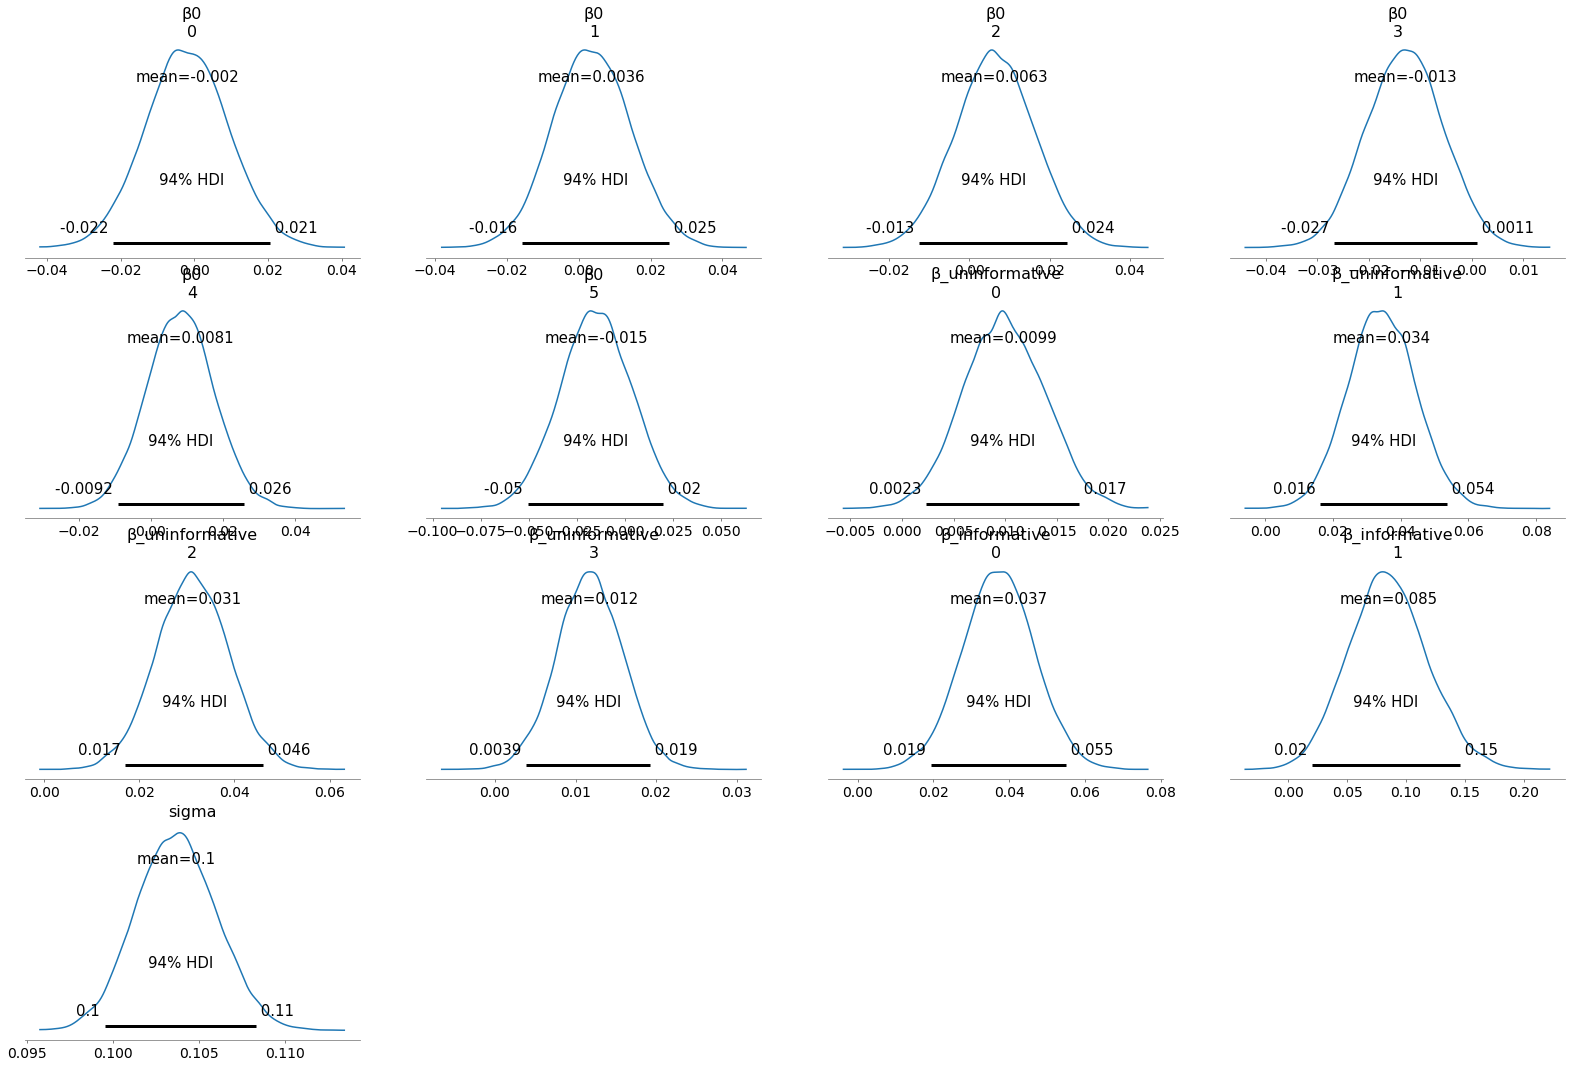

In [ ]:
az.plot_posterior(pp_trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (49) in plot_posterior, generating only 40 plots
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbac6eb5210>,
      dtype=object)

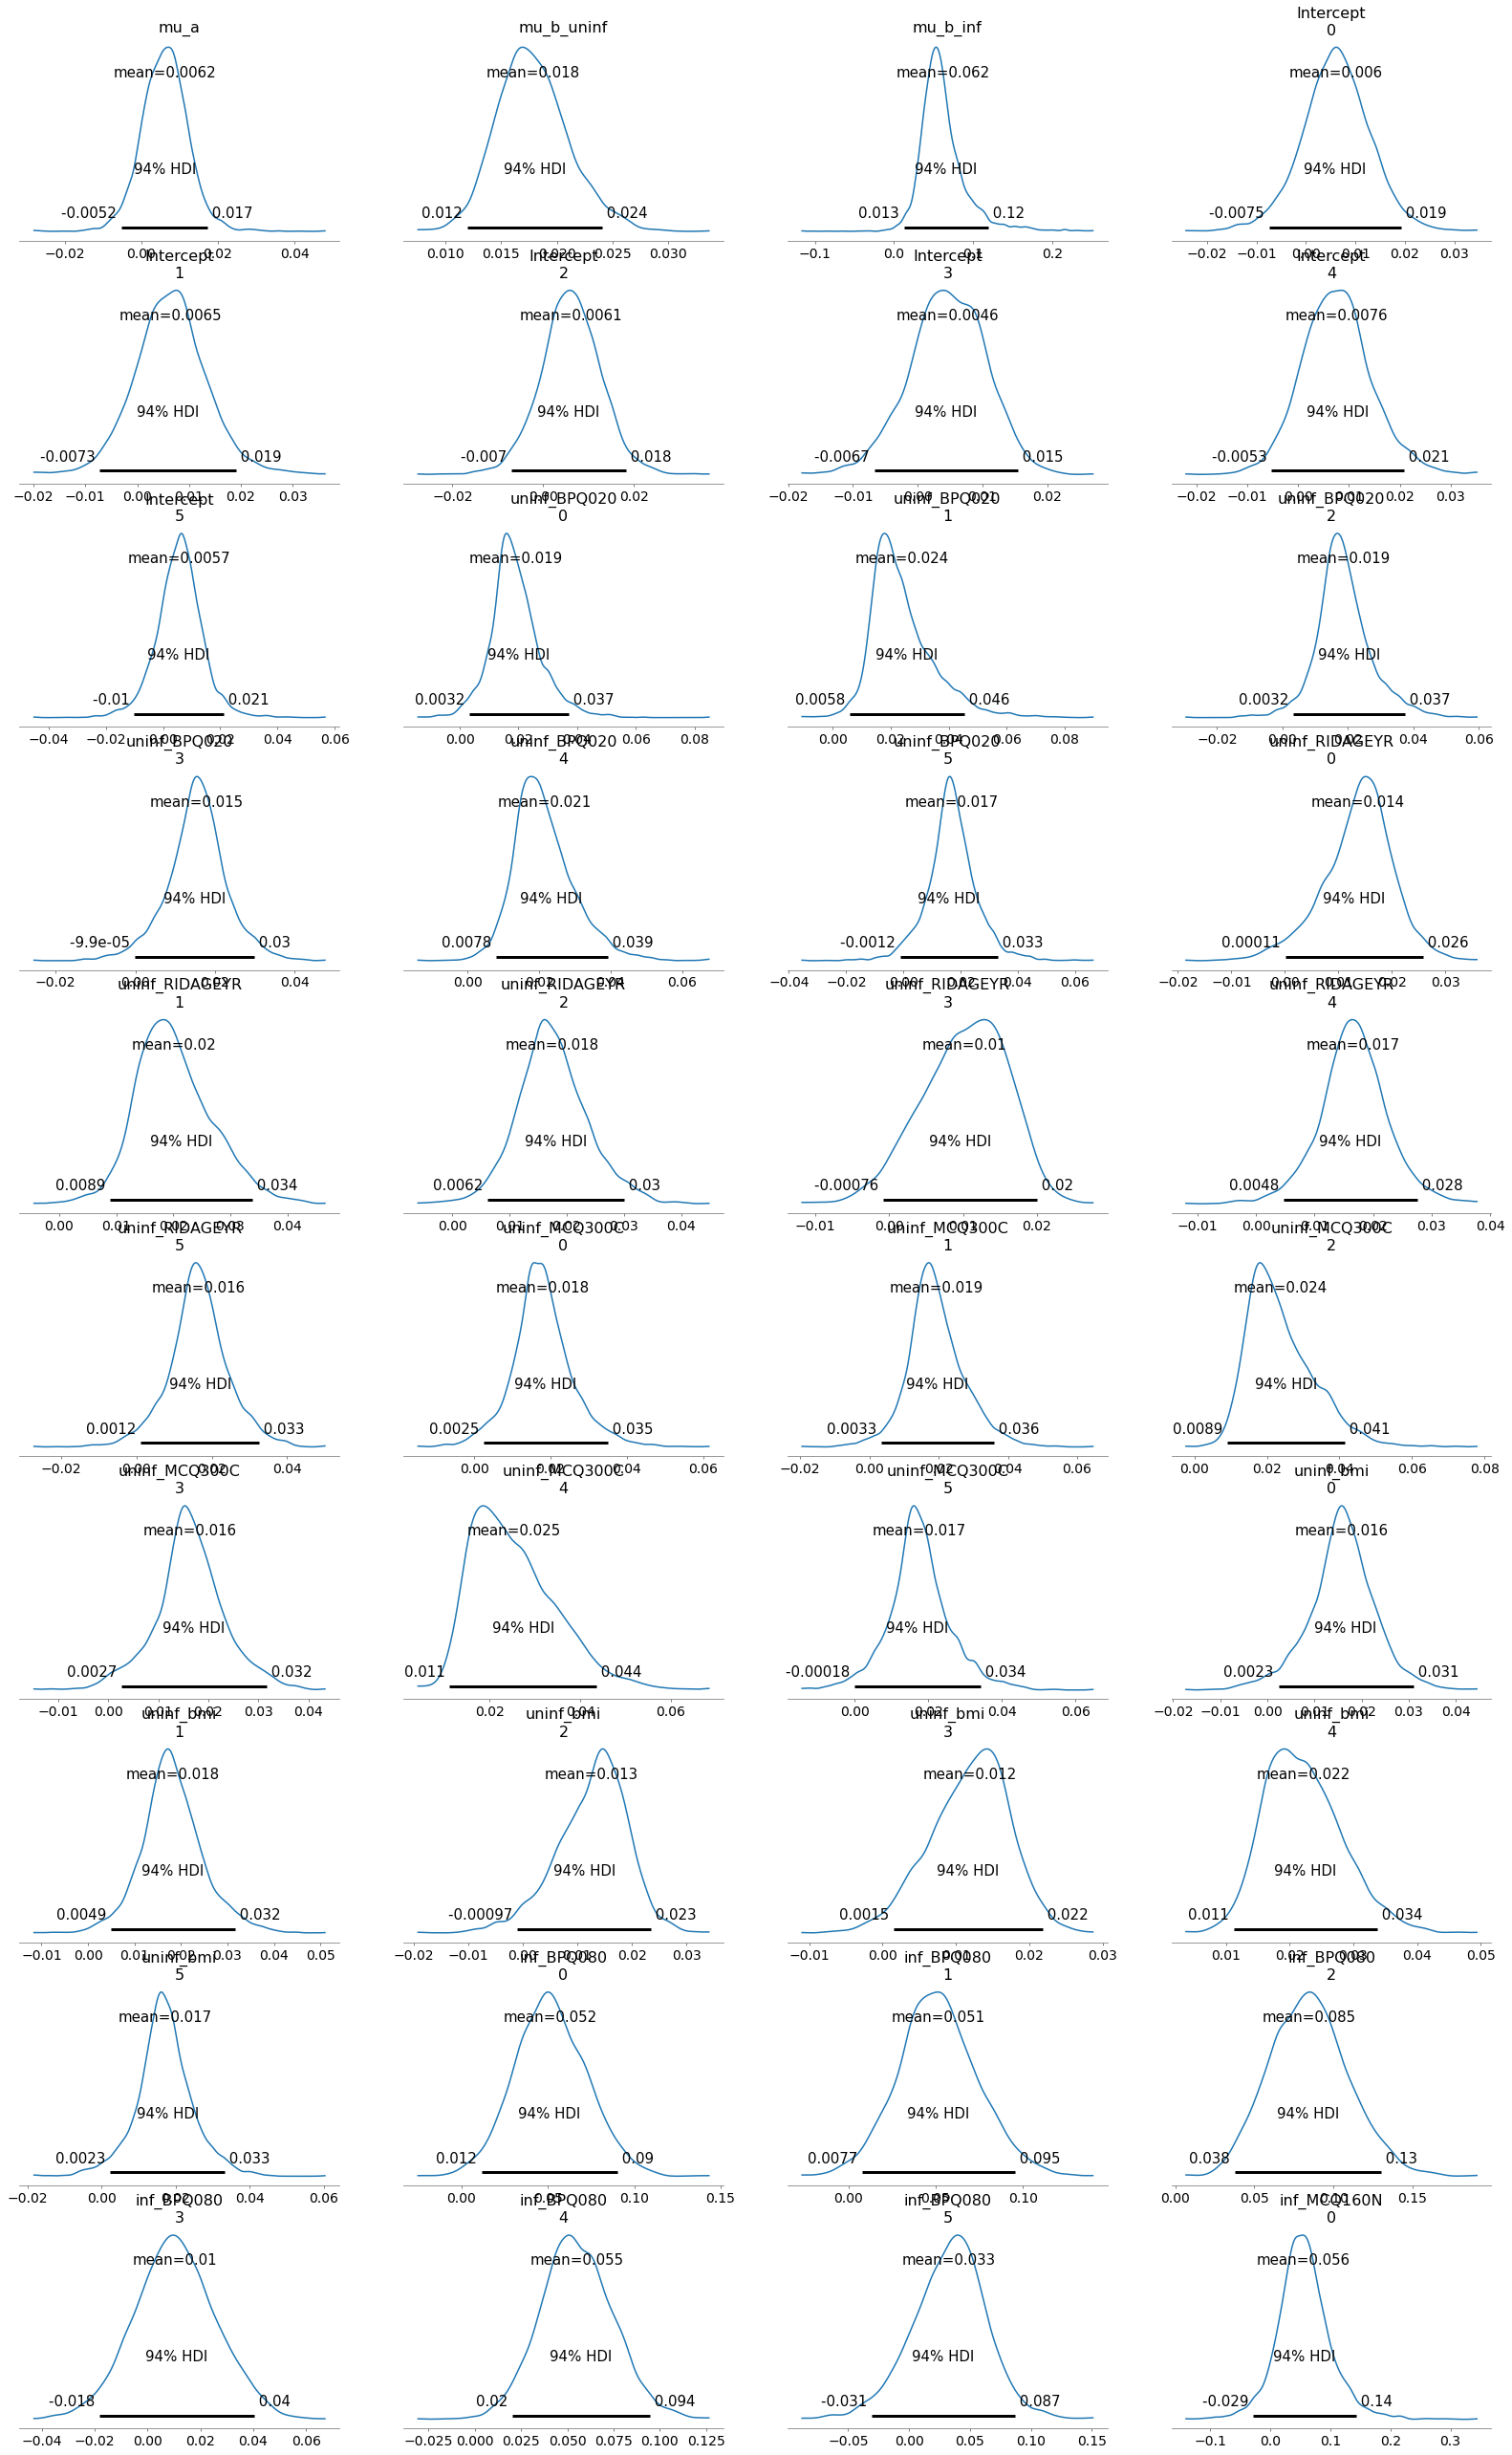

In [ ]:
az.plot_posterior(hierarch_trace)

In [ ]:
test_data = pooled_model_logits['y_hat']

In [ ]:
X_test_reset = X_test.reset_index()

In [ ]:
full_test = pd.concat([X_test_reset, Y_test], axis=1)

In [ ]:
Mex_Diab = full_test[(full_test["RIDRETH3"]==1.0) & (full_test["DIQ010"]==1)].index.tolist()
Mex_NDiab = full_test[(full_test["RIDRETH3"]==1.0) & (full_test["DIQ010"]==0)].index.tolist()
OHisp_Diab = full_test[(full_test["RIDRETH3"]==2.0) & (full_test["DIQ010"]==1)].index.tolist()
OHisp_NDiab = full_test[(full_test["RIDRETH3"]==2.0) & (full_test["DIQ010"]==0)].index.tolist()
White_Diab = full_test[(full_test["RIDRETH3"]==3.0) & (full_test["DIQ010"]==1)].index.tolist()
White_NDiab = full_test[(full_test["RIDRETH3"]==3.0) & (full_test["DIQ010"]==0)].index.tolist()
Black_Diab = full_test[(full_test["RIDRETH3"]==4.0) & (full_test["DIQ010"]==1)].index.tolist()
Black_NDiab = full_test[(full_test["RIDRETH3"]==4.0) & (full_test["DIQ010"]==0)].index.tolist()
Asian_Diab = full_test[(full_test["RIDRETH3"]==6.0) & (full_test["DIQ010"]==1)].index.tolist()
Asian_NDiab = full_test[(full_test["RIDRETH3"]==6.0) & (full_test["DIQ010"]==0)].index.tolist()
Other_Diab = full_test[(full_test["RIDRETH3"]==7.0) & (full_test["DIQ010"]==1)].index.tolist()
Other_NDiab = full_test[(full_test["RIDRETH3"]==7.0) & (full_test["DIQ010"]==0)].index.tolist()

All_Diab = full_test[(full_test["DIQ010"]==1)].index.tolist()
All_NDiab = full_test[(full_test["DIQ010"]==0)].index.tolist()

In [ ]:
test_posterior_subgroup = [np.NaN] * len(test_data[0])
for i in range(0, len(test_data[0])): # 479
  arr = np.array([np.NaN] * len(test_data)) # 1000
  for j in range(0, len(test_data)): # 1000
    arr[j] = test_data[j][i]
  test_posterior_subgroup[i] = arr
test_posterior_subgroup = np.array(test_posterior_subgroup)

In [ ]:
testing_array = [np.NaN] * len(Mex_Diab)
for i in range(0, len(Mex_Diab)):
  j = Mex_Diab[i]
  testing_array[i] = test_data[j]


In [ ]:
arr_of_arr = [np.NaN]*len(test_data)
for i in range(0, len(test_data)):
  mt = np.array([])
  for j in range(0, len(Mex_Diab)):
    k = Mex_Diab[j]
    mt = np.append(mt, test_data[i][k])
  arr_of_arr[i] = mt
arr_of_arr = np.asarray(arr_of_arr)
dicty = {'y_hat':arr_of_arr}

In [ ]:
# Samples must be in the form of sample["y_hat"]
def make_group(lt, samples):
  arr_of_arr = [np.NaN]*len(samples)
  for i in range(0, len(samples)):
    mt = np.array([])
    for j in range(0, len(lt)):
      k = lt[j]
      mt = np.append(mt, samples[i][k])
    arr_of_arr[i] = mt
  arr_of_arr = np.asarray(arr_of_arr)
  dicty = {'y_hat':arr_of_arr}
  return dicty

### Pooled Credible Intervals

/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (52). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (427). Passed array should have shape (chains, draws, *shape)
  UserWarning,


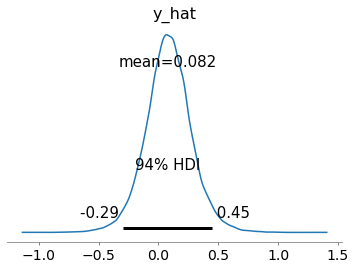

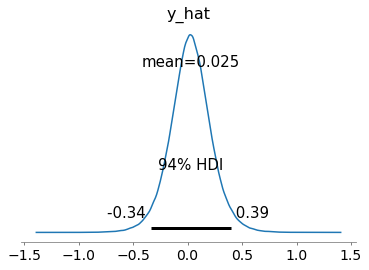

In [ ]:
pooled_diab = make_group(All_Diab, pooled_logits)
pooled_Ndiab = make_group(All_NDiab, pooled_logits)
az.plot_posterior(pooled_diab)
az.plot_posterior(pooled_Ndiab)

### Partially Pooled Credible Intervals

In [ ]:
mexican_diabetics_pp = make_group(Mex_Diab, partially_pooled_model_logits)
mexican_Ndiabetics_pp = make_group(Mex_NDiab, partially_pooled_model_logits)
ohisp_diabetics_pp = make_group(OHisp_Diab, partially_pooled_model_logits)
ohisp_Ndiabetics_pp = make_group(OHisp_NDiab, partially_pooled_model_logits)
white_diabetics_pp = make_group(White_Diab, partially_pooled_model_logits)
white_Ndiabetics_pp = make_group(White_NDiab, partially_pooled_model_logits)
black_diabetics_pp = make_group(Black_Diab, partially_pooled_model_logits)
black_Ndiabetics_pp = make_group(Black_NDiab, partially_pooled_model_logits)
asian_diabetics_pp = make_group(Asian_Diab, partially_pooled_model_logits)
asian_Ndiabetics_pp = make_group(Asian_NDiab, partially_pooled_model_logits)
other_diabetics_pp = make_group(Other_Diab, partially_pooled_model_logits)
other_Ndiabetics_pp = make_group(Other_NDiab, partially_pooled_model_logits)

/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (8). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (66). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (6). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (40). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (14). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (100

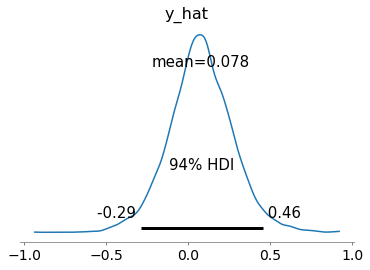

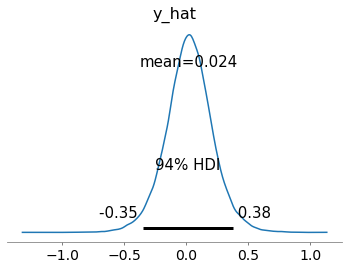

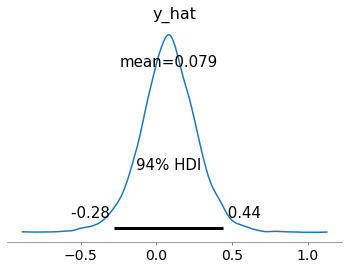

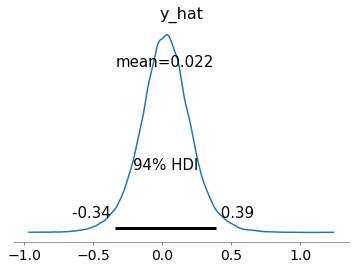

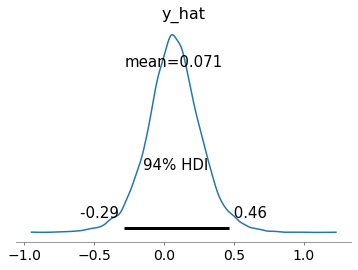

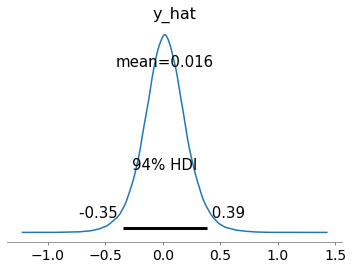

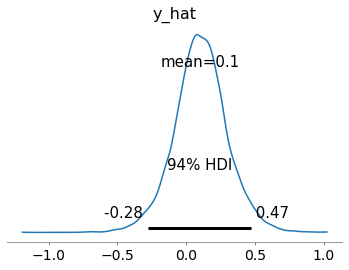

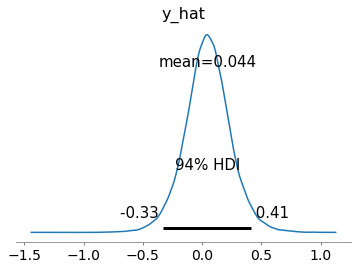

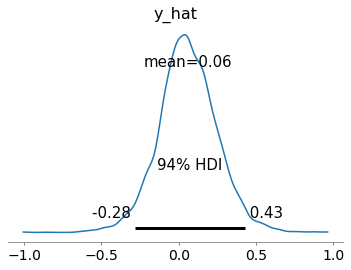

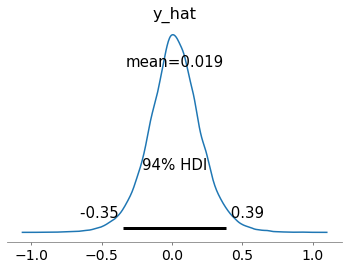

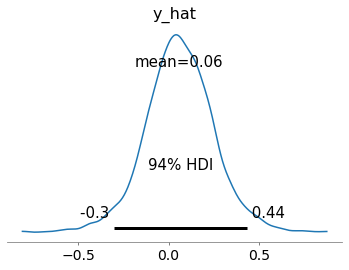

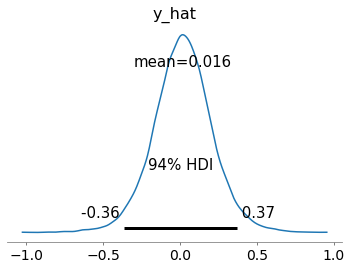

In [ ]:
az.plot_posterior(mexican_diabetics_pp)
az.plot_posterior(mexican_Ndiabetics_pp)
az.plot_posterior(ohisp_diabetics_pp)
az.plot_posterior(ohisp_Ndiabetics_pp)
az.plot_posterior(white_diabetics_pp)
az.plot_posterior(white_Ndiabetics_pp)
az.plot_posterior(black_diabetics_pp)
az.plot_posterior(black_Ndiabetics_pp)
az.plot_posterior(asian_diabetics_pp)
az.plot_posterior(asian_Ndiabetics_pp)
az.plot_posterior(other_diabetics_pp)
az.plot_posterior(other_Ndiabetics_pp)

### Hierarchical Credible Intervals

In [ ]:
mexican_diabetics_h = make_group(Mex_Diab, hierarch_logitsi_y)
mexican_Ndiabetics_h = make_group(Mex_NDiab, hierarch_logitsi_y)
ohisp_diabetics_h = make_group(OHisp_Diab, hierarch_logitsi_y)
ohisp_Ndiabetics_h = make_group(OHisp_NDiab, hierarch_logitsi_y)
white_diabetics_h = make_group(White_Diab, hierarch_logitsi_y)
white_Ndiabetics_h = make_group(White_NDiab, hierarch_logitsi_y)
black_diabetics_h = make_group(Black_Diab, hierarch_logitsi_y)
black_Ndiabetics_h = make_group(Black_NDiab, hierarch_logitsi_y)
asian_diabetics_h = make_group(Asian_Diab, hierarch_logitsi_y)
asian_Ndiabetics_h = make_group(Asian_NDiab, hierarch_logitsi_y)
other_diabetics_h = make_group(Other_Diab, hierarch_logitsi_y)
other_Ndiabetics_h = make_group(Other_NDiab, hierarch_logitsi_y)

/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (8). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (66). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (6). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (40). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (14). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (100

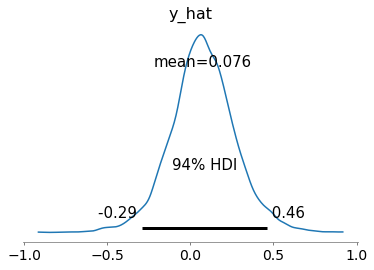

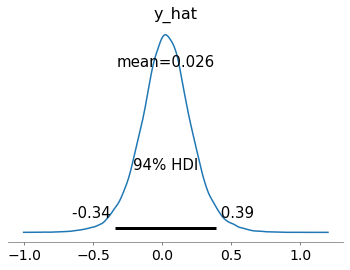

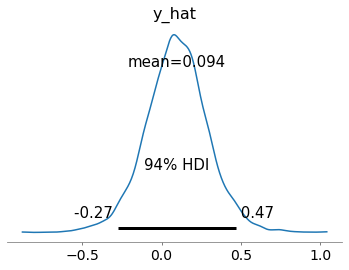

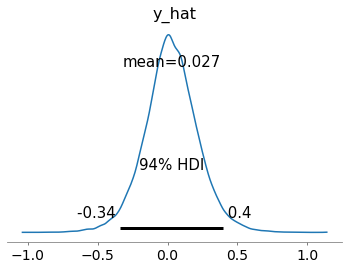

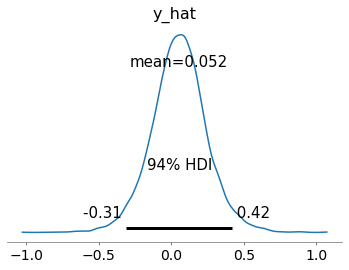

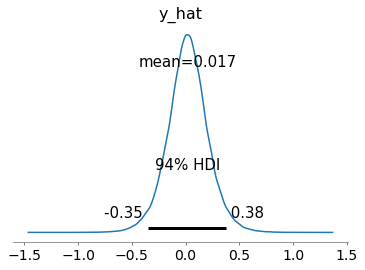

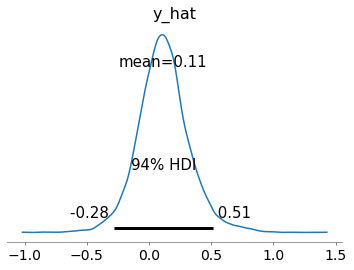

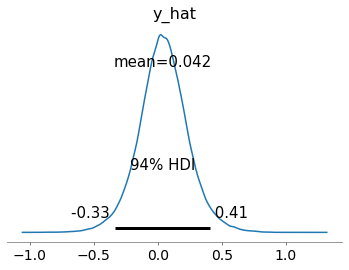

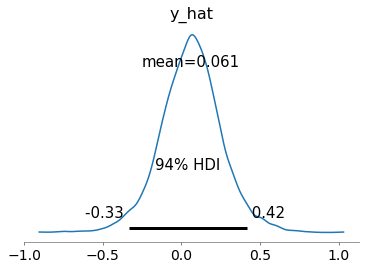

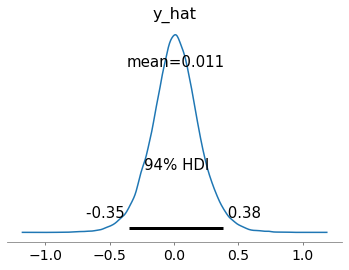

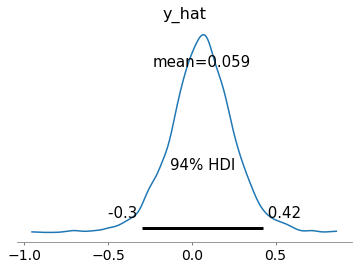

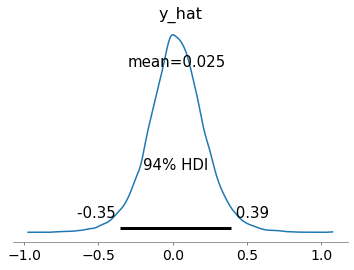

In [ ]:
az.plot_posterior(mexican_diabetics_h)
az.plot_posterior(mexican_Ndiabetics_h)
az.plot_posterior(ohisp_diabetics_h)
az.plot_posterior(ohisp_Ndiabetics_h)
az.plot_posterior(white_diabetics_h)
az.plot_posterior(white_Ndiabetics_h)
az.plot_posterior(black_diabetics_h)
az.plot_posterior(black_Ndiabetics_h)
az.plot_posterior(asian_diabetics_h)
az.plot_posterior(asian_Ndiabetics_h)
az.plot_posterior(other_diabetics_h)
az.plot_posterior(other_Ndiabetics_h)